# Анализ лояльности пользователей Яндекс Афиши

- Автор: Черницкая Мария
- Дата: 23.02.2026

**Цели и задачи проекта**

***Цель:*** На основе данных о заказах билетов на культурные мероприятия провести комплексный анализ поведения пользователей Яндекс Афиши для выявления ключевых факторов, влияющих на повторные покупки, и разработки рекомендаций по удержанию аудитории.

**Задачи:**

***1. Подготовка и первичный анализ данных:***

- Провести предобработку данных: приведение валют (тенге - рубли), обработка пропусков и отрицательных значений
- Выявить и исключить статистические выбросы (по выручке, количеству билетов, аномальным пользователям)
- Создать профили пользователей для дальнейшего анализа

***2. Анализ сегментов первого заказа ("точки входа"):***

Исследовать распределение новых пользователей по:

- типу первого мероприятия
- типу устройства
- региону первого заказа
- билетному оператору
- Выявить сегменты с максимальной концентрацией новых пользователей

***3. Анализ возвращаемости:***

- Рассчитать долю повторных покупок в каждом сегменте
- Сравнить возвращаемость между сегментами
- Выявить сегменты с возвращаемостью выше/ниже средней
- Определить наиболее успешные "точки входа" с точки зрения удержания

***4. Анализ влияния выручки и состава заказа:***

- Исследовать связь между средней выручкой и повторными покупками
- Сравнить группы пользователей с разным количеством заказов (1 заказ, 2-4 заказа, 5+ заказов)
- Проверить статистическую значимость различий в выручке между группами
- Проанализировать распределение пользователей по ценовым диапазонам

***5. Проверка продуктовых гипотез:***

* Гипотеза 1: Спортивные мероприятия лучше концертов удерживают пользователей
* Гипотеза 2: В регионах с высокой активностью выше доля повторных заказов

***6. Разработка рекомендаций:***

- Определить портрет наиболее лояльного пользователя
- Сформулировать рекомендации по привлечению и удержанию аудитории
- Выявить сегменты, требующие дополнительных маркетинговых усилий

<a id='содержание'></a>
**Содержание проекта**

**1. Загрузка и первичный анализ данных**

* [1.1. Загрузка данных](#1-1)
* [1.2. Изучение данных](#1-2)
* [1.3. Промежуточный вывод](#1-3)

---

**2. Предобработка данных**

* [2.1. Приведение выручки к единой валюте](#2-1)
* [2.2. Преобразование типов данных](#2-2)
* [2.2.1. Проверка данных на полные и неполные дубликаты](#2-2-1)
* [2.3. Создание признака первого заказа](#2-3)
* [2.4. Обработка отрицательных значений выручки](#2-4)
* [2.5. Проверка категориальных данных](#2-5)
* [2.6. Анализ числовых данных и выявление выбросов](#2-6)
* [2.7. Фильтрация выбросов](#2-7)
* [2.8. Промежуточный вывод после предобработки](#2-8) 


**3. Создание профиля пользователя и анализ аномалий**

* [3.1. Агрегация данных и основные показатели](#3-1)
* [3.2. Статистика по заказам, билетам и интервалам](#3-2)
* [3.3. Выявленные аномалии в профилях пользователей](#3-3)
* [3.4. Удаление аномального пользователя](#3-4)


**4. Исследовательский анализ данных**

***4.1. Исследование признаков первого заказа и их связи с возвращением на платформу***

* [4.1.1. Распределение пользователей по типу мероприятия, типу устройства, по регионам и по операторам](#4-1-1)
* [4.1.2. Выводы по сегментам первого заказа](#4-1-2)

***4.2. Анализ выручки и состава заказа***

* [4.2.1 Определение размера сегментов](#4-2-1)
* [4.2.2 Визуализация маленьких и больших сегментов](#4-2-2)
* [4.2.3 Анализ стабильности данных](#4-2-3)
* [4.2.4 Промежуточный вывод](#4-2-4)
* [4.2.5 Анализ больших сегментов](#4-2-5)
* [4.2.6 Детальный анализ по признакам](#4-2-6)
* [4.2.7 Сегменты выше среднего](#4-2-7)
* [4.2.8 Итоговый вывод по анализу возвратов пользователей](#4-2-8)

***4.3. Проверка продуктовых гипотез***

* [4.3.1 Гипотеза 1. Спорт vs Концерты](#4-3-1)
* [4.3.2 Гипотеза 2. Активные vs менее активные регионы](#4-3-2)
* [4.3.3 Итоговый вывод по гипотезам](#4-3-3)

***4.4. Анализ поведения пользователей через показатели выручки и состава заказа***

* [4.4.1. Агрегация данных и общая статистика](#4-4-1)
* [4.4.2. Сегментация на группы 1 заказ и 2+ заказа](#4-4-2)
* [4.4.3. Визуализация распределений](#4-4-3)
* [4.4.4. Анализ диапазонов выручки](#4-4-4)
* [4.4.5. Статистическая значимость различий](#4-4-5)
* [4.4.6. Итоговый вывод по связи выручки и повторных заказов](#4-4-6)

***4.5. Сравнение средней выручки в группах 2+ и 5+ заказов***

* [4.5.1. Подготовка данных,распределение по группам и вывод статистики по группам](#4-5-1)
* [4.5.2.  Визуализация распределений](#4-5-2)
* [4.5.3. Выоды по сравнению групп 2+ и 5+ заказов](#4-5-3)


***4.6. Анализ влияния количества билетов на повторные покупки***

* [4.6.1. Агрегация данных и общая статистика](#4-6-1)
* [4.6.2. Сегментация по среднему количеству билетов и анализ по сегментам](#4-6-2)
* [4.6.3. Визуализация распределения](#4-6-3)
* [4.6.4. Вывод по анализу влияния количества билетов на повторные покупки](#4-6-4)


***4.7. Анализ влияния дня недели первого заказа на повторные покупки***

* [4.7.1. Подготовка данных и статистика по дням недели](#4-7-1)
* [4.7.2. Визуализация распределения](#4-7-2)
* [4.7.3. Вывод по анализу влияния дня недели первой покупки](#4-7-3)


***4.8 Анализ влияния интервалов между заказами на удержание***

* [4.8.1. Подготовка данных](#4-8-1)
* [4.8.2. Статистика по группам](#4-8-2)
* [4.8.3. Визуализация](#4-8-3)
* [4.8.4. Статистическая значимость](#4-8-4)
* [4.8.5. Вывод по анализу влияния интервала между заказами](#4-8-5)


***4.9 Корреляционный анализ количества покупок и признаков пользователя***

* [4.9.1. Подготовка данных и создание признаков](#4-9-1)
* [4.9.2. Корреляционный анализ Phi_k и анализ по сегментам лояльности](#4-9-2)
* [4.9.3. Вывод по корреляционному анализу признаков пользователя](#4-9-3)


**[5. Итоговый вывод и рекомендации](#5)**

**[6. Финализация проекта и публикация](#6)**


<a id="1-1"></a>
**1.1. Загрузка данных**

In [1]:
# Устанавливаем библиотеки SQLAlchemy
!pip install sqlalchemy

In [2]:
# Устанавливаем модуль psycopg2
!pip install psycopg2-binary

In [3]:
# Для работы с переменными окружения устанавливаем модуль python-dotenv
!pip install python-dotenv

In [4]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from matplotlib.ticker import SymmetricalLogLocator
import seaborn as sns
import numpy as np
from scipy import stats
import sys
import site
import warnings
import os
from dotenv import load_dotenv

warnings.filterwarnings('ignore')

# Добавляем пользовательский путь для phik
user_site = site.getusersitepackages()
if user_site not in sys.path:
    sys.path.insert(0, user_site)

# Импортируем phik
from phik import phik_matrix
from phik.report import plot_correlation_matrix
print("✅ phik успешно импортирован!")
print("✅ dotenv успешно импортирован!")

✅ phik успешно импортирован!
✅ dotenv успешно импортирован!


<a id='env-load'></a>

In [5]:
# Подключаемся к базе данных Практикума через .env

load_dotenv()  # загружает данные из .env

# Параметры подключатся автоматически из .env
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT')
db_name = os.getenv('DB_NAME')

In [6]:
# Формируем строку подключения (используем переменные из .env)
connection_string = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'

# Создаём engine
engine = create_engine(connection_string)

print("✅ Подключение к БД настроено")

✅ Подключение к БД настроено


In [7]:
engine = create_engine(connection_string)

In [8]:
# Проверяем корректность подключения
try:
    engine = create_engine(connection_string)
    # Тестовое подключение
    with engine.connect() as conn:
        print("✅ Подключение успешно!")
except Exception as e:
    print(f"❌ Ошибка подключения: {e}")

✅ Подключение успешно!


In [9]:
# Формируем ETL-запрос для получения данных о покупках билетов на события (кроме фильмов)
# через мобильные и десктопные устройства для анализа пользовательского поведения.
query = """
WITH set_config_precode AS (
  SELECT set_config('synchronize_seqscans', 'off', true)
)
SELECT 
  p.user_id,
  p.device_type_canonical,
  p.order_id,
  p.created_dt_msk as order_dt,
  p.created_ts_msk as order_ts,
  p.currency_code,
  p.revenue,
  p.tickets_count,
  EXTRACT(DAY FROM (p.created_dt_msk - 
    LAG(p.created_dt_msk) OVER (PARTITION BY p.user_id ORDER BY p.created_dt_msk)
  ))::integer as days_since_prev,
  p.event_id,
  e.event_name_code as event_name,
  e.event_type_main,
  p.service_name,
  r.region_name,
  c.city_name
FROM afisha.purchases p
LEFT JOIN afisha.events e ON p.event_id = e.event_id
LEFT JOIN afisha.city c ON e.city_id = c.city_id
LEFT JOIN afisha.regions r ON c.region_id = r.region_id
WHERE p.device_type_canonical IN ('mobile', 'desktop')
  AND (e.event_type_main IS NULL OR e.event_type_main != 'фильм')
ORDER BY p.user_id;
"""

In [10]:
# Загрузка результатов аналитического запроса в pandas DataFrame
df = pd.read_sql_query(query, con=engine)

# Валидация загрузки
if df.empty:
    print("DataFrame пустой!")
else:
    print(f"Успешно загружено: {df.shape[0]:,} строк и {df.shape[1]} колонок")
    print(f"Диапазон дат: {df['order_dt'].min()} - {df['order_dt'].max()}")
    print(f"Уникальных пользователей: {df['user_id'].nunique()}")

Успешно загружено: 290,611 строк и 15 колонок
Диапазон дат: 2024-06-01 00:00:00 - 2024-10-31 00:00:00
Уникальных пользователей: 21933


<a id="1-2"></a>
**1.2. Изучение данных**

In [11]:
# Выводим первые строки датафрейма на экран
df.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,region_name,city_name
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Каменевский регион,Глиногорск
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,Мой билет,Каменевский регион,Глиногорск
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,За билетом!,Каменевский регион,Глиногорск
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,Лови билет!,Североярская область,Озёрск
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,Билеты без проблем,Озернинский край,Родниковецк


In [12]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  service_name           290611 non-null  obje

In [13]:
# Проверка дубликатов по order_id
assert df['order_id'].is_unique, "❌ Найдены дубликаты order_id!"
print(f"✅ order_id уникален. Всего заказов: {df['order_id'].nunique()}")

✅ order_id уникален. Всего заказов: 290611


In [14]:
# Проверка валют и отрицаеьных значений
print(f"Валюты: {df['currency_code'].unique()}")
print(f"Отрицательных заказов: {(df['revenue'] < 0).sum()} ({((df['revenue'] < 0).sum()/len(df)*100):.2f}%)")
print(f"Min revenue: {df['revenue'].min():.2f}, Max: {df['revenue'].max():.2f}")

Валюты: ['rub' 'kzt']
Отрицательных заказов: 381 (0.13%)
Min revenue: -90.76, Max: 81174.54


In [15]:
# Проверка tickets_count
print(f"Отрицательные значения: {(df['tickets_count'] < 0).sum()}")
print(f"Нулевые значения: {(df['tickets_count'] == 0).sum()}")
print(f"Min tickets: {df['tickets_count'].min()}, Max tickets: {df['tickets_count'].max()}")

Отрицательные значения: 0
Нулевые значения: 0
Min tickets: 1, Max tickets: 57


<a id="1-3"></a>
**1.3. Промежуточный вывод о данных**

Датасет содержит 290 611 строк и 15 столбцов с информацией о заказах билетов на культурные мероприятия.

***Структура данных:***

- Данные содержат как категориальные (8 столбцов типа object), так и числовые признаки (7 столбцов — int64 (3), float64 (2), datetime64 (2))
- Названия столбцов уже оптимально оформлены в snake_case — краткие, понятные и соответствуют стандартам оформления данных в pandas. Изменений не требуется
- Идентификаторы заказа (order_id) и события (event_id) представлены целыми числами, пользовательские идентификаторы (user_id) — в корректном строковом формате
- Временные признаки (order_dt, order_ts) уже преобразованы в datetime64

***Качество данных:***

- 13 из 15 столбцов заполнены полностью (100% non‑null)
- Единственное поле с пропусками — days_since_prev: 21 933 пропущенных значения (7,5% от данных)
- Пропуски носят закономерный характер — отсутствуют для первых заказов пользователей, удаление или некорректное заполнение не требуется
- Дубликаты по ключу order_id отсутствуют (первичный ключ корректен)
- Выручка (revenue) представлена двумя валютами (российский рубль и казахстанских тенге) и содержит отрицательные значения, что противоречит бизнес-логике (выручка не может быть отрицательной). Предположительно — возвраты/отмены заказов или технические ошибки выгрузки
- Количество билетов (tickets_count) не содержит отрицательных или нулевых значений - данные валидны. Однако, требуется проверка высоких значений (максимальное количество билетов - 57). Возможно данные заказы являются корпоративными, групповыми покупками или техническими артефактами

***Семантика данных:***

- Значения в столбцах соответствуют бизнес-смыслу: даты заказов, выручка, тип мероприятия, сервис-посредник, география
- Поле days_since_prev хранит целое число дней, но приведено к float64 из‑за наличия NaN — требуется корректировка типа
- Валютная разнородность и наличие отрицательной выручки требуют дополнительного исследования причин
- Географическая информация представлена регионом и городом, заполнена полностью

***Планы по предобработке:***

- Привести все заказы в тенге к рублёвому эквиваленту
- Проанализировать частоту и распределение отрицательных значений выручки. Принять решение: удалить, заменить на 0 или выделить в отдельный признак «возврат»
- Необходимо определить пороговые значения и принять решение об обработке выбросов tickets_count. Проверить связь аномальных заказов с типом мероприятия и сервисом
- Преобразовать days_since_prev в целочисленный тип с поддержкой NaN (Int64) и заполнить пропуски нулём для первых заказов
- Извлечь производные временные признаки: год, месяц, день недели, час заказа
- Создать признаки на уровне пользователей: частота заказов, средний чек, общая выручка, время жизни
- Проверить и при необходимости агрегировать редкие категории в event_type_main и service_name
- Оценить распределение заказов по городам и регионам для возможного объединения малочисленных групп

[⬆️ К содержанию](#содержание)

**2. Предобработка данных**

Комплексная подготовка данных к анализу: приведение выручки к единой валюте (тенге - рубли), обработка пропусков и создание признака первого заказа, проверка дубликатов, преобразование типов, нормализация категориальных признаков, выявление и фильтрация выбросов по 99-му перцентилю и правилу IQR, формирование промежуточных выводов.

<a id="2-1"></a>
**2.1. Приведение выручки к единой валюте**

In [16]:
# 1. Загружаем и проверяем данные о курсе
url = 'https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv'

try:
    df_tenge = pd.read_csv(url)
    print("✅ Файл с курсом тенге успешно загружен")
    
    # Проверяем данные о курсе
    print("\nПервые строки данных о курсе:")
    print(df_tenge.head())
    print(f"\nПериод данных: с {df_tenge['data'].min()} по {df_tenge['data'].max()}")
    print(f"Всего записей: {len(df_tenge)}")
    
except Exception as e:
    print(f"❌ Ошибка загрузки: {e}")

✅ Файл с курсом тенге успешно загружен

Первые строки данных о курсе:
         data  nominal     curs  cdx
0  2024-01-10      100  19.9391  kzt
1  2024-01-11      100  19.7255  kzt
2  2024-01-12      100  19.5839  kzt
3  2024-01-13      100  19.4501  kzt
4  2024-01-14      100  19.4501  kzt

Период данных: с 2024-01-10 по 2024-12-31
Всего записей: 357


In [17]:
# 2. Подготавливаем данные о курсе
df_tenge = df_tenge.rename(columns={'data': 'date'})
df_tenge['date'] = pd.to_datetime(df_tenge['date'])

# 3. Присоединяем курс к каждому заказу по дате
df = df.merge(
    df_tenge[['date', 'curs']], 
    left_on='order_dt', 
    right_on='date', 
    how='left'
)

# 4. Создаём столбец revenue_rub с пересчётом через .where()
df['revenue_rub'] = df['revenue'].where(
    df['currency_code'] == 'rub', 
    df['revenue'] * df['curs'] / 100
).round(2)

# 5. Компактная проверка результата
print("\n✅ Выручка приведена к рублям")
print("\nПримеры пересчёта (заказы в тенге):")
kzt_orders = df[df['currency_code'] == 'kzt'][['order_dt', 'revenue', 'curs', 'revenue_rub']].head(3)
print(kzt_orders.to_string(index=False))


✅ Выручка приведена к рублям

Примеры пересчёта (заказы в тенге):
  order_dt  revenue    curs  revenue_rub
2024-09-17   518.10 19.0125        98.50
2024-09-02   347.18 18.9330        65.73
2024-09-09   328.77 18.5991        61.15


**Промежуточный вывод по конвертации валют**

***1. Данные о курсе тенге:***

- Загружен датасет с курсом ЦБ за 2024 год (357 записей)
- Период: с 10 января по 31 декабря 2024 года
- Курс представлен за 100 тенге, что учтено в расчётах

***2. Результаты конвертации:***

- Выполнено объединение данных о курсе с основным датафреймом по дате заказа
- Создан новый столбец revenue_rub с выручкой в рублях
- Для заказов в тенге применён пересчёт: revenue * curs / 100
- Для заказов в рублях значения сохранены без изменений
- Все значения округлены до двух знаков

***3. Проверка корректности:***

- Курс успешно подгружен для всех дат (первые значения: 18.70, 18.34, 19.65)
- Примеры пересчёта корректны: 518 тенге × 19.01 / 100 = 98.50 руб.

**Итог:** Все финансовые показатели приведены к единой валюте. Данные готовы к дальнейшему анализу.

<a id="2-2"></a>
**2.2. Преобразование типов данных**

In [18]:
# Преобразование days_since_prev в Int64 (с поддержкой NaN)
if df['days_since_prev'].dtype == 'float64':
    df['days_since_prev'] = df['days_since_prev'].astype('Int64')

print(f"✅ Тип days_since_prev: {df['days_since_prev'].dtype}")

✅ Тип days_since_prev: Int64


<a id="2-2-1"></a>
**2.2.1 Проверка данных на полные и неполные дубликаты** <a id='duplicates'></a>

In [19]:
# 1. Проверка полных дубликатов (все колонки одинаковые)
full_duplicates = df.duplicated(keep=False)
print(f"Полные дубликаты: {full_duplicates.sum()} строк")

if full_duplicates.sum() > 0:
    print("Примеры полных дубликатов:")
    print(df[full_duplicates].head(10))
    
    # Удаляем полные дубликаты, если они есть
    df_before = len(df)
    df = df.drop_duplicates(keep='first')
    print(f"✅ Удалено полных дубликатов: {df_before - len(df)} строк")

# 2. Проверка на возможные дубликаты заказов (по order_id)
#    order_id должен быть уникальным идентификатором заказа
order_duplicates = df['order_id'].duplicated(keep=False)
print(f"\nДубликаты по order_id: {order_duplicates.sum()} строк")

if order_duplicates.sum() > 0:
    print("❌ Обнаружены дубликаты order_id — ошибка в данных!")
    print(df[order_duplicates].sort_values('order_id').head(10))

# 3. Проверка неполных дубликатов по ключевым признакам
key_cols = ['user_id', 'order_dt', 'revenue', 'tickets_count', 'event_id']
partial_duplicates = df.duplicated(subset=key_cols, keep=False)

print(f"\nНеполные дубликаты (по ключевым признакам): {partial_duplicates.sum()} строк")

if partial_duplicates.sum() > 0:
    print("Примеры неполных дубликатов (возможно, системные ошибки):")
    print(df[partial_duplicates].sort_values(['user_id', 'order_dt']).head(10))

Полные дубликаты: 0 строк

Дубликаты по order_id: 0 строк

Неполные дубликаты (по ключевым признакам): 86455 строк
Примеры неполных дубликатов (возможно, системные ошибки):
            user_id device_type_canonical  order_id   order_dt  \
9   000cf0659a9f40f                mobile   6818017 2024-06-20   
10  000cf0659a9f40f                mobile   6818046 2024-06-20   
11  000cf0659a9f40f                mobile   6818075 2024-06-20   
12  000cf0659a9f40f                mobile   6818104 2024-06-20   
14  000cf0659a9f40f                mobile   6818191 2024-06-20   
15  000cf0659a9f40f                mobile   6818249 2024-06-20   
16  000cf0659a9f40f                mobile   6818220 2024-06-20   
18  000cf0659a9f40f                mobile   6759611 2024-06-21   
19  000cf0659a9f40f                mobile   6817959 2024-06-21   
20  000cf0659a9f40f                mobile   6817988 2024-06-21   

              order_ts currency_code  revenue  tickets_count  days_since_prev  \
9  2024-06-20 10:35

**Промежуточный вывод по дубликатам**

***1. Полные дубликаты:***

- Полностью идентичные записи отсутствуют (0 строк)
- Данные корректны на уровне полных копий

***2. Дубликаты по order_id:***

- Нарушений уникальности идентификатора заказа не обнаружено (0 строк)
- Первичный ключ order_id работает корректно

***3. Неполные дубликаты по ключевым признакам (86 455 строк):***

Обнаружены множественные записи с одинаковыми user_id, event_id, order_dt, revenue - это не ошибка системы, а реальное поведение пользователей:

- Приобретение билетов на одно мероприятие в несколько заходов (в течение дня или нескольких дней)
- Докупка билетов для разных категорий посетителей
- Разделение платежей при групповых покупках

Такие сценарии подтверждаются разными order_id и временем заказа (от минут до дней)

**Итог:** Данные не содержат технических дубликатов, требующих удаления. Все множественные записи отражают реальную пользовательскую активность и сохраняются для дальнейшего анализа поведения клиентов.

<a id="2-3"></a>
**2.3. Создание признака первого заказа**

In [20]:
# Пропуски в days_since_prev — это первые заказы пользователей.
# Удалять или заполнять их нельзя, т.к. это важный признак.
# Вместо этого создадим отдельную колонку-индикатор "первый заказ"
df['is_first_order'] = df['days_since_prev'].isna().astype(int)
print("✅ Создан признак is_first_order (1 — первый заказ)")

✅ Создан признак is_first_order (1 — первый заказ)


<a id="2-4"></a>
**2.4. Обработка отрицательных значений выручки**

In [21]:
# Анализируем частоту и распределение отрицательных значений выручки

# Базовая статистика
total_rows = len(df)
total_negative = (df['revenue_rub'] < 0).sum()
negative_percent = total_negative / total_rows * 100

print(f"Отрицательных значений: {total_negative} ({negative_percent:.4f}%)")
print(f"Сумма отрицательной выручки: {df[df['revenue_rub'] < 0]['revenue_rub'].sum():.2f} руб.")

# Созлаем датасет после обработки
df_processed = df.copy()

# Принятие решения
if negative_percent < 1:
    print("\n✅ Доля отрицательных значений мала (<1%) — удаляем")
    df_processed = df_processed[df_processed['revenue_rub'] >= 0].copy()
    print(f"Удалено строк: {total_negative}")
    
elif negative_percent < 5:
    print("\n⚠️ Заменяем отрицательные значения на 0")
    df_processed['revenue_rub'] = df_processed['revenue_rub'].clip(lower=0)
    print(f"Заменено значений: {total_negative}")
    
else:
    print("\n📊 Создаём отдельный признак 'is_refund'")
    df_processed['is_refund'] = (df_processed['revenue_rub'] < 0).astype(int)
    df_processed['revenue_rub'] = df_processed['revenue_rub'].abs()
    print(f"Доля возвратов: {df_processed['is_refund'].mean()*100:.2f}%")

# Финальная проверка
print("Итоговая статистика")
print(f"Размер датасета: {len(df_processed)} строк")
print(f"Минимальное значение revenue_rub: {df_processed['revenue_rub'].min():.2f}")
print(f"Доля отрицательных: {(df_processed['revenue_rub'] < 0).sum() / len(df) * 100:.4f}%")

Отрицательных значений: 381 (0.1311%)
Сумма отрицательной выручки: -949.59 руб.

✅ Доля отрицательных значений мала (<1%) — удаляем
Удалено строк: 381
Итоговая статистика
Размер датасета: 290230 строк
Минимальное значение revenue_rub: 0.00
Доля отрицательных: 0.0000%


<a id="2-5"></a>
**2.5. Проверка категориальных данных**

In [22]:
# Проверяем ключевые столбцы на наличие ошибок
categorical_cols = ['device_type_canonical', 'event_type_main', 
                    'service_name', 'region_name', 'city_name']

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Уникальных значений: {df_processed[col].nunique()}")
    print(f"  Топ-5: {df_processed[col].value_counts().head(3).to_dict()}")
    
    # Проверка на значения-заменители пропусков
    special_values = ['unknown', 'не указано', 'NULL', 'None', '', ' ']
    for val in special_values:
        if val in df[col].values:
            print(f" Найдено значение '{val}' — возможно ошибка")
# Проверили категории на наличие значений-заменителей пропусков.
# Все значения корректны, нормализация не требуется.


device_type_canonical:
  Уникальных значений: 2
  Топ-5: {'mobile': 232132, 'desktop': 58098}

event_type_main:
  Уникальных значений: 7
  Топ-5: {'концерты': 115275, 'театр': 67321, 'другое': 65552}

service_name:
  Уникальных значений: 36
  Топ-5: {'Билеты без проблем': 63294, 'Лови билет!': 41088, 'Билеты в руки': 40250}

region_name:
  Уникальных значений: 81
  Топ-5: {'Каменевский регион': 91058, 'Североярская область': 44035, 'Широковская область': 16387}

city_name:
  Уникальных значений: 352
  Топ-5: {'Глиногорск': 89446, 'Озёрск': 43896, 'Радужсвет': 13710}


<a id="2-6"></a>
**2.6. Анализ числовых данных и выявление выбросов**

In [23]:
# Проверяем распределение численных данных и наличие в них выбросов
numeric_cols = ['revenue_rub', 'tickets_count', 'days_since_prev']

for col in numeric_cols:
    if col in df_processed.columns:
        print(f"\n{col}:")
        print(f"  Min: {df_processed[col].min()}")
        print(f"  Max: {df_processed[col].max()}")
        print(f"  Mean: {df_processed[col].mean():.2f}")
        print(f"  Median: {df_processed[col].median():.2f}")
        print(f"  Std: {df_processed[col].std():.2f}")
        
        # Процентили для выявления выбросов
        percentiles = [0.25, 0.5, 0.75, 0.99]
        for p in percentiles:
            print(f"  {p*100:.0f}%: {df_processed[col].quantile(p):.2f}")



revenue_rub:
  Min: 0.0
  Max: 81174.54
  Mean: 556.30
  Median: 352.08
  Std: 875.84
  25%: 114.61
  50%: 352.08
  75%: 802.25
  99%: 2628.42

tickets_count:
  Min: 1
  Max: 57
  Mean: 2.76
  Median: 3.00
  Std: 1.17
  25%: 2.00
  50%: 3.00
  75%: 4.00
  99%: 6.00

days_since_prev:
  Min: 0
  Max: 148
  Mean: 3.22
  Median: 0.00
  Std: 11.35
  25%: 0.00
  50%: 0.00
  75%: 1.00
  99%: 63.00


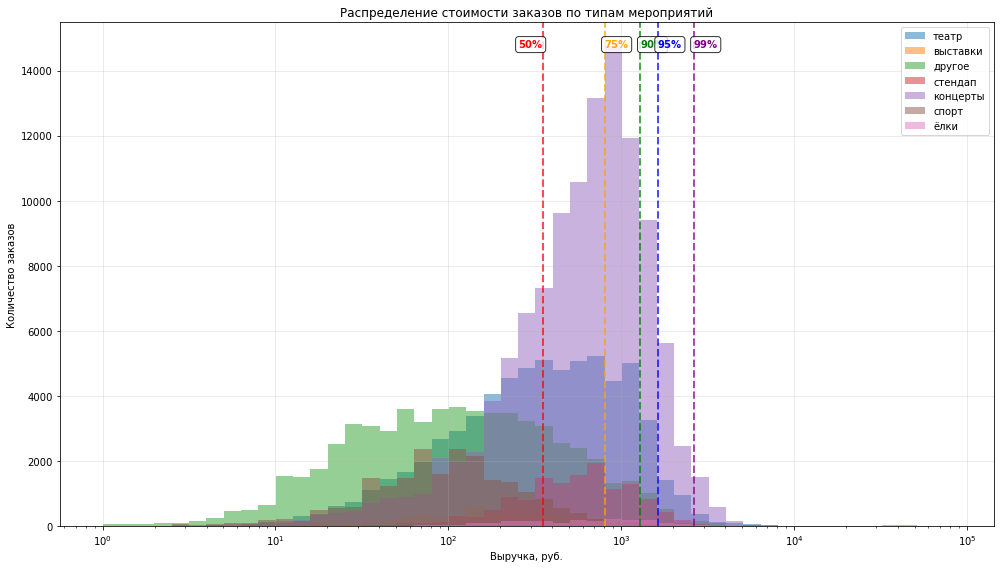


 Всего заказов: 290,230
 Среднее: 556.30 руб.
 Медиана (50%): 352.08 руб.
 Минимум: 0.00 руб.
 Максимум: 81174.54 руб.

 Заказов выше 99%: 2825 (0.97%)
 Сумма выручки выше 99%: 12,373,772.25 руб.
 Доля в общей выручке: 7.66%

📊 Распределение билетов в заказах выше 99-го перцентиля:
1       10
2      158
3      523
4     1170
5      618
6      338
7        4
8        3
12       1
Name: tickets_count, dtype: int64

Минимум билетов: 1
Максимум билетов: 12
Среднее: 4.2
Медиана: 4


In [24]:
plt.figure(figsize=(14, 8))

for event_type in df_processed['event_type_main'].unique():
    subset = df_processed[df_processed['event_type_main'] == event_type]['revenue_rub']
    bins = np.logspace(0, np.log10(df_processed['revenue_rub'].max() + 1), 50)
    plt.hist(subset, bins=bins, alpha=0.5, label=event_type, histtype='stepfilled')

plt.xscale('log')
plt.title('Распределение стоимости заказов по типам мероприятий')
plt.xlabel('Выручка, руб.')
plt.ylabel('Количество заказов')
plt.legend()
plt.grid(True, alpha=0.3)

# Добавляем процентили для оценки границ распределения
ymax = plt.ylim()[1]
percentiles = [50, 75, 90, 95, 99]
colors = ['red', 'orange', 'green', 'blue', 'purple']
percentile_values = []

for p, color in zip(percentiles, colors):
    p_val = df_processed['revenue_rub'].quantile(p/100)
    percentile_values.append(p_val)
    plt.axvline(x=p_val, color=color, linestyle='--', alpha=0.7, linewidth=2)
    plt.text(p_val, ymax * 0.95, f'{p}%', color=color, fontsize=10, fontweight='bold',
             ha='right' if p < 75 else 'left',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Общая статистика по выручке
print(f"\n Всего заказов: {len(df_processed):,}")
print(f" Среднее: {df_processed['revenue_rub'].mean():.2f} руб.")
print(f" Медиана (50%): {df_processed['revenue_rub'].median():.2f} руб.")
print(f" Минимум: {df_processed['revenue_rub'].min():.2f} руб.")
print(f" Максимум: {df_processed['revenue_rub'].max():.2f} руб.")

# Анализ выбросов по 99-му перцентилю
total_orders = len(df_processed)
p99 = percentile_values[4]
above_p99 = df_processed[df_processed['revenue_rub'] > p99]
count_above_p99 = len(above_p99)
percent_above_p99 = (count_above_p99 / total_orders) * 100

print(f"\n Заказов выше 99%: {count_above_p99} ({percent_above_p99:.2f}%)")
print(f" Сумма выручки выше 99%: {above_p99['revenue_rub'].sum():,.2f} руб.")
print(f" Доля в общей выручке: {(above_p99['revenue_rub'].sum() / df_processed['revenue_rub'].sum()) * 100:.2f}%")

# Проверяем количество билетов в заказах-выбросах
print("\n📊 Распределение билетов в заказах выше 99-го перцентиля:")
print(above_p99['tickets_count'].value_counts().sort_index())

print(f"\nМинимум билетов: {above_p99['tickets_count'].min()}")
print(f"Максимум билетов: {above_p99['tickets_count'].max()}")
print(f"Среднее: {above_p99['tickets_count'].mean():.1f}")
print(f"Медиана: {above_p99['tickets_count'].median():.0f}")

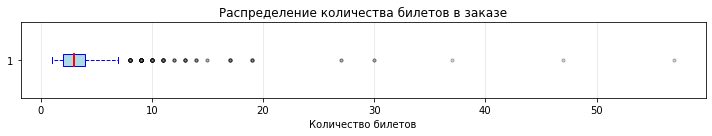

Медиана: 3 билетов
Q1 (25%): 2 билетов
Q3 (75%): 4 билетов
Максимум: 57 билетов


In [25]:
# диаграммы размаха по билетам в заказе
plt.figure(figsize=(10, 2))

# Строим горизонтальный boxplot
plt.boxplot(df_processed['tickets_count'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue', linestyle='--'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red', linewidth=2),
            flierprops=dict(marker='o', markerfacecolor='gray', markersize=3, alpha=0.3))

plt.title('Распределение количества билетов в заказе')
plt.xlabel('Количество билетов')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Статистика
print(f"Медиана: {df_processed['tickets_count'].median():.0f} билетов")
print(f"Q1 (25%): {df_processed['tickets_count'].quantile(0.25):.0f} билетов")
print(f"Q3 (75%): {df_processed['tickets_count'].quantile(0.75):.0f} билетов")
print(f"Максимум: {df_processed['tickets_count'].max():.0f} билетов")

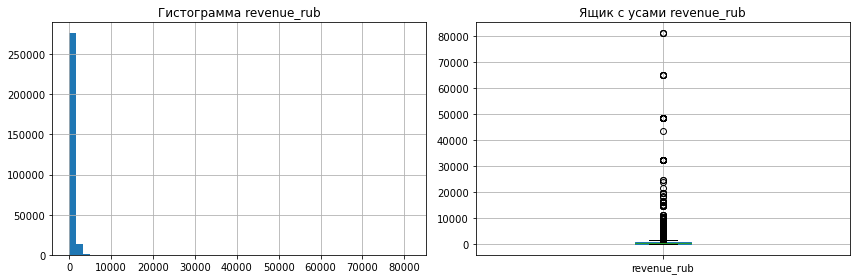

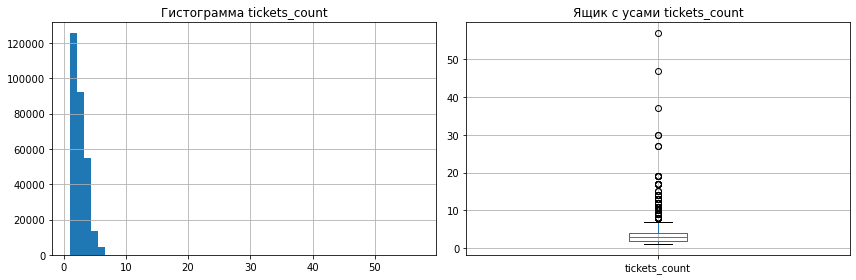

In [26]:
# Функция для визуализации
def plot_distribution(data, column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    data[column].hist(ax=ax1, bins=50)
    ax1.set_title(f'Гистограмма {column}')
    data.boxplot(column=column, ax=ax2)
    ax2.set_title(f'Ящик с усами {column}')
    plt.tight_layout()
    plt.show()

# Графики
plot_distribution(df_processed, 'revenue_rub')
plot_distribution(df_processed, 'tickets_count')

<a id="2-7"></a>
**2.7. Фильтрация выбросов**

In [27]:
# Исключаем явные аномалии
# 1. По стоимостному признаку (99-й перцентиль)
# 2. По количеству билетов (правило IQR)

# Границы отсечения
p99_revenue = df_processed['revenue_rub'].quantile(0.99)

Q1 = df_processed['tickets_count'].quantile(0.25)
Q3 = df_processed['tickets_count'].quantile(0.75)
IQR = Q3 - Q1
upper_fence_tickets = Q3 + 1.5 * IQR

# Создаём чистый датасет
df_clean = df_processed[
    (df_processed['revenue_rub'] <= p99_revenue) & 
    (df_processed['tickets_count'] <= upper_fence_tickets)
].copy()

print(f"Исходный размер: {len(df_processed)}")
print(f"После удаления выбросов: {len(df_clean)}")
print(f"Удалено строк: {len(df_processed) - len(df_clean)} ({(len(df_processed) - len(df_clean))/len(df_processed)*100:.2f}%)")

Исходный размер: 290230
После удаления выбросов: 287283
Удалено строк: 2947 (1.02%)


<a id="2-8"></a>
**2.8. Промежуточный вывод после предобработки**

Датасет после предобработки содержит 287 283 строки и 16 столбцов с информацией о заказах билетов на культурные мероприятия.

***Структура данных:***
- Данные содержат как категориальные (8 столбцов типа object), так и числовые признаки (8 столбцов — int64 (4), float64 (2), datetime64 (2))
- Добавлен новый признак is_first_order (int64) — индикатор первого заказа пользователя

***Качество данных:***
* Полная заполненность: все 16 столбцов не содержат пропусков (100% non‑null)
* Валютная конвертация: все заказы приведены к единой валюте — российскому рублю (новый столбец revenue_rub)
* Отрицательные значения: выявлено 381 отрицательное значение (0,13% от выборки) на сумму -949,59 руб. Принято решение об удалении данных записей, так как их доля мала, а отрицательная выручка противоречит бизнес-логике
* Тип данных days_since_prev: успешно преобразован из float64 в Int64 с сохранением пропусков для первых заказов
* Категориальные признаки: проверены на наличие значений-заменителей пропусков — отклонений не выявлено

***Анализ выбросов:***

<span style="color:purple">***По выручке (revenue_rub):***</span>
* Медианное значение: 352 руб.
* 99-й перцентиль: 2 628 руб.
* Выявлено 2 825 заказов (0,97%) с суммой выше 99-го перцентиля. На них приходится 12,4 млн руб. (7,66% общей выручки)
* Максимальная сумма заказа (81 174 руб.) превышает медиану в 230 раз

<span style="color:purple">***По количеству билетов (tickets_count):***</span>

* Медианное значение: 3 билета
* 75% заказов содержат не более 4 билетов
* Межквартильный размах (IQR): Q3 - Q1 = 4 - 2 = 2
* Верхняя граница по правилу IQR: Q3 + 1,5×IQR = 4 + 3 = 7 билетов
* Присутствуют аномальные значения до 57 билетов

***Обработка выбросов:***

На основе проведённого анализа принято решение об исключении явных аномалий:
- По выручке: заказы, превышающие 99-й перцентиль (>2 628 руб.)
- По билетам: заказы, превышающие верхнюю границу IQR (>7 билетов)

В результате сформирован финальный чистый датасет:
- Исходный размер после удаления отрицательных значений: 290 230 строк
- После удаления выбросов: 287 283 строки
- Удалено: 2 947 строк (1,02% данных)

***Итоговая структура данных:***

Финальный датасет содержит все исходные столбцы, дополненные новым признаком:
* is_first_order — индикатор первого заказа пользователя (1 — первый заказ, 0 — повторный)
* revenue_rub — выручка в рублях (после конвертации валют и удаления отрицательных значений)

***Планы по дальнейшему анализу:***
- Извлечь производные временные признаки: год, месяц, день недели, час заказа
- Создать признаки на уровне пользователей: частота заказов, средний чек, общая выручка, время жизни
- Проверить и при необходимости агрегировать редкие категории в event_type_main и service_name
- Оценить распределение заказов по городам и регионам для возможного объединения малочисленных групп
- Провести корреляционный анализ признаков с использованием phik matrix

[⬆️ К содержанию](#содержание)

**3. Создание профиля пользователя и анализ аномалий**

Формирование агрегированных профилей пользователей с ключевыми метриками (первый заказ, количество покупок, средний чек, интервалы), расчёт статистических показателей, выявление аномалий, принятие решения по их обработке и создание финального датасета для анализа лояльности.

<a id="3-1"></a>
**3.1. Агрегация данных и основные показатели**

In [28]:
# Строим профиль пользователя
profiles = (df_clean
            # В начале сортируем данные по дате совершения заказа, чтобы найти первые признаки
            .sort_values(by='order_ts')
            # Затем группируем по номеру пользователя и агрегируем данные
            .groupby('user_id')
            .agg(
                # Находим первую и последнюю даты заказа
                first_order_dt=('order_dt', 'min'),
                last_order_dt=('order_dt', 'max'),
                
                # Находим устройства, регион, название билетного партнера и тип мероприятия первого заказа
                first_device=('device_type_canonical', 'first'),
                first_region=('region_name', 'first'),
                first_partner=('service_name', 'first'),
                first_genre=('event_type_main', 'first'),
                
                # Подсчитываем количество заказов
                total_orders=('order_id', 'count'),
                
                # Считаем статистику по заказам: средняя стоимость заказа, среднее количество билетов
                avg_revenue=('revenue_rub', 'mean'),
                avg_tickets=('tickets_count', 'mean'),
                
                # Считаем среднее количество дней между покупками
                avg_days_between=('days_since_prev', 'mean')
            )
            # Создаем два признака: совершил ли пользователь 2 / 5 и более заказов
            .assign(
                is_two=lambda x: x['total_orders'] >= 2,
                is_five=lambda x: x['total_orders'] >= 5
            )
            .reset_index()
)

# Создаём группы по количеству заказов
profiles['orders_group'] = None
profiles.loc[profiles['total_orders'] == 1, 'orders_group'] = '1 заказ'
profiles.loc[(profiles['total_orders'] >= 2) & (profiles['total_orders'] <= 4), 'orders_group'] = '2-4 заказа'
profiles.loc[profiles['total_orders'] >= 5, 'orders_group'] = '5 и более заказов'

print(f"Всего пользователей: {len(profiles)}")
print(profiles.head())

# Проверяем распределение
one_order = (profiles['total_orders'] == 1).sum()
two_to_four = ((profiles['total_orders'] >= 2) & (profiles['total_orders'] <= 4)).sum()
five_plus = (profiles['total_orders'] >= 5).sum()

print("\n Распределение по количеству заказов:")
print(f"  Сделали 1 заказ: {one_order} ({one_order/len(profiles)*100:.1f}%)")
print(f"  Сделали 2+ заказа: {two_to_four} ({two_to_four/len(profiles)*100:.1f}%)")
print(f"  Сделали 5+ заказов: {five_plus} ({five_plus/len(profiles)*100:.1f}%)")

Всего пользователей: 21834
           user_id first_order_dt last_order_dt first_device  \
0  0002849b70a3ce2     2024-08-20    2024-08-20       mobile   
1  0005ca5e93f2cf4     2024-07-23    2024-10-06       mobile   
2  000898990054619     2024-07-13    2024-10-23       mobile   
3  00096d1f542ab2b     2024-08-15    2024-08-15      desktop   
4  000a55a418c128c     2024-09-29    2024-10-15       mobile   

           first_region  first_partner first_genre  total_orders  avg_revenue  \
0    Каменевский регион   Край билетов       театр             1  1521.940000   
1    Каменевский регион      Мой билет    выставки             2   774.010000   
2  Североярская область    Лови билет!      другое             3   767.213333   
3    Каменевский регион   Край билетов       театр             1   917.830000   
4      Поленовский край  Лучшие билеты       театр             2    61.310000   

   avg_tickets  avg_days_between  is_two  is_five orders_group  
0     4.000000              <NA>   F

<a id="3-2"></a>
**3.2. Статистика по заказам, билетам и интервалам**

In [29]:
# Анализ профиля пользователей

# 1. Основные показатели
print("Основные показатели")

total_users = len(profiles)  
print(f"Общее число пользователей: {total_users:}")

# Средняя выручка с одного заказа (по всем заказам, не по пользователям)
avg_revenue_per_order = df_clean['revenue_rub'].mean()
print(f"Средняя выручка с одного заказа: {avg_revenue_per_order:.2f} руб.")

# Доли пользователей по количеству заказов
users_2plus = (profiles['total_orders'] >= 2).sum()  
users_5plus = (profiles['total_orders'] >= 5).sum()  

print(f"\n Распределение пользователей:")
print(f"  Сделали 2+ заказа: {users_2plus} ({users_2plus/total_users*100:.1f}%)")
print(f"  Сделали 5+ заказов: {users_5plus} ({users_5plus/total_users*100:.1f}%)")

# 2. Статистика

# По общему числу заказов (на пользователя)
print("\nОбщее число заказов (на пользователя):")
print(f"  Минимум: {profiles['total_orders'].min()}")  
print(f"  Максимум: {profiles['total_orders'].max()}")  
print(f"  Среднее: {profiles['total_orders'].mean():.2f}")  
print(f"  Медиана: {profiles['total_orders'].median():.0f}")  
print(f"  Стандартное отклонение: {profiles['total_orders'].std():.2f}") 

# По среднему числу билетов в заказе
print("\nСреднее число билетов (на пользователя):")
print(f"  Минимум: {profiles['avg_tickets'].min():.2f}")  
print(f"  Максимум: {profiles['avg_tickets'].max():.2f}")  
print(f"  Среднее: {profiles['avg_tickets'].mean():.2f}")  
print(f"  Медиана: {profiles['avg_tickets'].median():.2f}") 
print(f"  Стандартное отклонение: {profiles['avg_tickets'].std():.2f}") 

# По среднему количеству дней между покупками
print("\nСреднее количество дней между покупками:")
# Убираем NaN (пользователи с 1 заказом)
avg_days_clean = profiles['avg_days_between'].dropna()  # ← заменили
print(f"  Пользователей с повторными заказами: {len(avg_days_clean)} ({len(avg_days_clean)/total_users*100:.1f}%)")
print(f"  Минимум: {avg_days_clean.min():.1f} дней")
print(f"  Максимум: {avg_days_clean.max():.1f} дней")
print(f"  Среднее: {avg_days_clean.mean():.1f} дней")
print(f"  Медиана: {avg_days_clean.median():.1f} дней")
print(f"  Стандартное отклонение: {avg_days_clean.std():.1f} дней")

# 3. Распределение по группам
print("\nРаспределение по группам")
if 'orders_group' in profiles.columns: 
    group_dist = profiles['orders_group'].value_counts()  
    group_pct = profiles['orders_group'].value_counts(normalize=True).mul(100).round(1) 
    
    for group in ['1 заказ', '2-4 заказа', '5 и более заказов']:
        if group in group_dist.index:
            print(f"  {group}: {group_dist[group]} ({group_pct[group]}%)")

Основные показатели
Общее число пользователей: 21834
Средняя выручка с одного заказа: 518.52 руб.

 Распределение пользователей:
  Сделали 2+ заказа: 13471 (61.7%)
  Сделали 5+ заказов: 6331 (29.0%)

Общее число заказов (на пользователя):
  Минимум: 1
  Максимум: 10159
  Среднее: 13.16
  Медиана: 2
  Стандартное отклонение: 121.51

Среднее число билетов (на пользователя):
  Минимум: 1.00
  Максимум: 7.00
  Среднее: 2.74
  Медиана: 2.75
  Стандартное отклонение: 0.90

Среднее количество дней между покупками:
  Пользователей с повторными заказами: 13508 (61.9%)
  Минимум: 0.0 дней
  Максимум: 148.0 дней
  Среднее: 15.8 дней
  Медиана: 8.0 дней
  Стандартное отклонение: 22.3 дней

Распределение по группам
  1 заказ: 8363 (38.3%)
  2-4 заказа: 7140 (32.7%)
  5 и более заказов: 6331 (29.0%)


<a id="3-3"></a>
**3.3. Выявленные аномалии в профилях пользователей:**

* По количеству заказов: при медианном значении 2 заказа на пользователя зафиксирован максимум 10 159 заказов, что является явным статистическим выбросом.

* Разброс данных: среднее число заказов составляет 13,16 при стандартном отклонении 121,51 — это указывает на экстремально высокую вариативность и наличие "тяжёлого хвоста" распределения, обусловленного единичным аномальным значением.

* По периодичности покупок: медианный интервал между заказами — 8 дней, однако максимальный достигает 148 дней, что свидетельствует о наличии сегмента редких покупателей (данное значение не является ошибкой и отражает реальное поведение пользователей).

***Принятое решение по обработке аномалий:***

На основе проведённого анализа принято решение удалить только конкретного пользователя с аномальным количеством заказов (10 159), а не проводить массовую фильтрацию по перцентилям. Данное решение обосновано следующими соображениями:

- Точечное воздействие: удаление одного пользователя устраняет основной источник искажения статистики, не затрагивая остальных крупных покупателей, которые могут быть важны для анализа.

- Сохранение данных: массовая фильтрация по 99-му перцентилю удалила бы около 218 пользователей (включая потенциально ценных), что неоправданно сократило бы выборку.

- Проверка влияния: расчёты подтверждают, что именно этот один пользователь создаёт 90% разброса данных и завышает среднее значение в 2,5 раза.

[⬆️ К содержанию](#содержание)

<a id="3-4"></a>
**3.4. Удаление аномального пользователя**

In [30]:
# Находим аномального пользователя
outlier_user = profiles[profiles['total_orders'] == profiles['total_orders'].max()]

if len(outlier_user) > 0:
    user_id_to_remove = outlier_user['user_id'].values[0]
    
    # Создаем df_final
    df_final = df_clean[df_clean['user_id'] != user_id_to_remove].copy()
    
    print(f"   Размер: {len(df_final)} строк")
    print(f"   Удалено строк: {len(df_clean) - len(df_final)}")
    
# Статистика
# По выручке
    print(f"\n   Выручка (revenue_rub):")
    print(f"   Минимум: {df_final['revenue_rub'].min():.2f} руб.")
    print(f"   Максимум: {df_final['revenue_rub'].max():.2f} руб.")
    print(f"   Среднее: {df_final['revenue_rub'].mean():.2f} руб.")
    print(f"   Медиана: {df_final['revenue_rub'].median():.2f} руб.")
    print(f"   Стандартное отклонение: {df_final['revenue_rub'].std():.2f} руб.")

# По количеству билетов
    print(f"\n   Количество билетов (tickets_count):")
    print(f"   Минимум: {df_final['tickets_count'].min()}")
    print(f"   Максимум: {df_final['tickets_count'].max()}")
    print(f"   Среднее: {df_final['tickets_count'].mean():.2f}")
    print(f"   Медиана: {df_final['tickets_count'].median():.0f}")
    print(f"   Стандартное отклонение: {df_final['tickets_count'].std():.2f}")

# По пользователям (через группировку)
    print(f"\n   Пользователи:")
    unique_users = df_final['user_id'].nunique()
    print(f"   Уникальных пользователей: {unique_users:}")
    print(f"   Среднее число заказов на пользователя: {len(df_final)/unique_users:.2f}")

   Размер: 277124 строк
   Удалено строк: 10159

   Выручка (revenue_rub):
   Минимум: 0.00 руб.
   Максимум: 2628.42 руб.
   Среднее: 519.00 руб.
   Медиана: 345.63 руб.
   Стандартное отклонение: 512.13 руб.

   Количество билетов (tickets_count):
   Минимум: 1
   Максимум: 7
   Среднее: 2.73
   Медиана: 3
   Стандартное отклонение: 1.14

   Пользователи:
   Уникальных пользователей: 21833
   Среднее число заказов на пользователя: 12.69


[⬆️ К содержанию](#содержание)


**4. Исследовательский анализ данных**

Комплексное исследование поведения пользователей: анализ сегментов первого заказа и "точек входа", оценка возвращаемости по категориям, проверка продуктовых гипотез, изучение связи выручки и лояльности, влияние количества билетов и временных характеристик на повторные покупки, корреляционный анализ признаков с применением phik и визуализация результатов.

<a id="4-1-1"></a>
***4.1.1. Распределение пользователей по типу мероприятия, типу устройства, по регионам и по операторам***

In [31]:
# Создаём профили пользователей из df_final
user_profile_final = df_final.groupby('user_id').agg(
    first_genre=('event_type_main', 'first'),
    first_device=('device_type_canonical', 'first'),
    first_region=('region_name', 'first'),
    first_partner=('service_name', 'first'),
    total_orders=('order_id', 'count')  # добавляем
).reset_index()


Распределение по типу первого мероприятия
  концерты               9652 пользователей ( 44.2%)
  другое                 5464 пользователей ( 25.0%)
  театр                  4281 пользователей ( 19.6%)
  стендап                1116 пользователей (  5.1%)
  спорт                   805 пользователей (  3.7%)
  выставки                420 пользователей (  1.9%)
  ёлки                     95 пользователей (  0.4%)

Распределение по типу устройства (первая покупка)
  mobile      18060 пользователей ( 82.7%)
  desktop      3773 пользователей ( 17.3%)

ТОП-10 регионов по первой покупке
  Каменевский регион          7166 пользователей ( 32.8%)
  Североярская область        3792 пользователей ( 17.4%)
  Широковская область         1233 пользователей (  5.6%)
  Озернинский край             681 пользователей (  3.1%)
  Малиновоярский округ         528 пользователей (  2.4%)
  Шанырский регион             502 пользователей (  2.3%)
  Травяная область             495 пользователей (  2.3%)
  Светоп

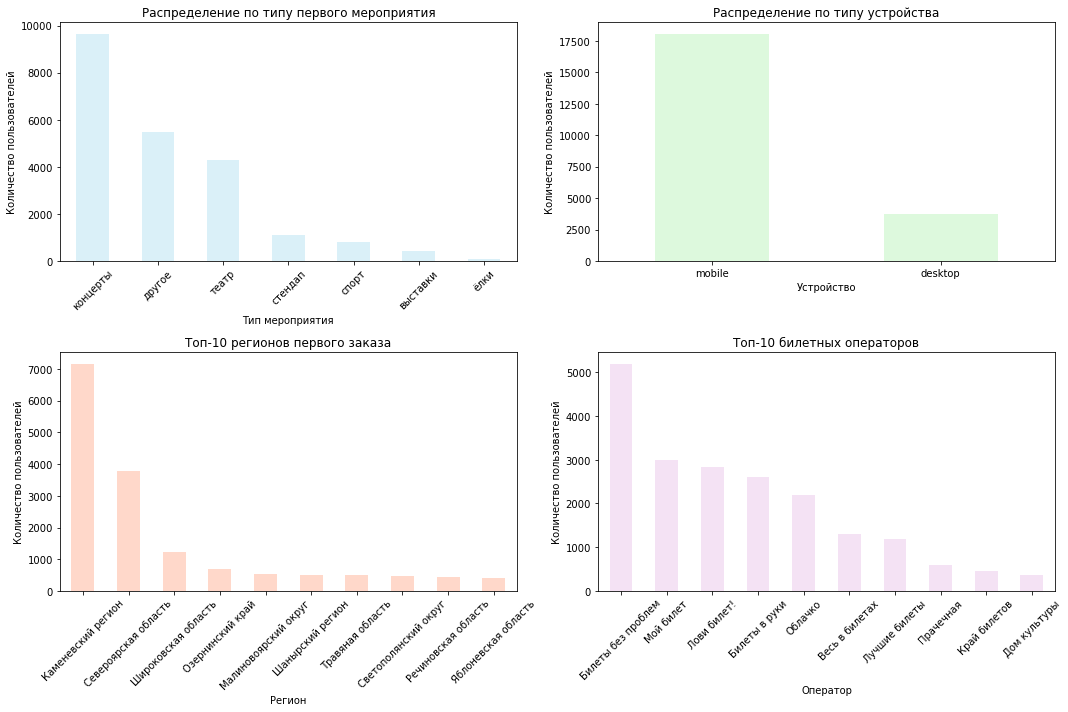

In [32]:
# Анализ пользователей по типу мероприятия
print("\nРаспределение по типу первого мероприятия")

genre_dist = user_profile_final['first_genre'].value_counts()
genre_pct = user_profile_final['first_genre'].value_counts(normalize=True).mul(100).round(1)

for genre in genre_dist.index:
    print(f"  {genre:<20} {genre_dist[genre]:>6} пользователей ({genre_pct[genre]:>5.1f}%)")

# Анализ по типу устройства
print("\nРаспределение по типу устройства (первая покупка)")

device_dist = user_profile_final['first_device'].value_counts()
device_pct = user_profile_final['first_device'].value_counts(normalize=True).mul(100).round(1)

for device in device_dist.index:
    print(f"  {device:<10} {device_dist[device]:>6} пользователей ({device_pct[device]:>5.1f}%)")

# Анализ по региону (топ-10)
print("\nТОП-10 регионов по первой покупке")

region_dist = user_profile_final['first_region'].value_counts().head(10)
region_pct = (region_dist / len(user_profile_final) * 100).round(1)

for region in region_dist.index:
    print(f"  {region:<25} {region_dist[region]:>6} пользователей ({region_pct[region]:>5.1f}%)")

print(f"\n  ... и ещё {user_profile_final['first_region'].nunique() - 10} регионов")

# Анализ по билетному оператору (топ-10)
print("\nТОП-10 билетных операторов (первая покупка)")

partner_dist = user_profile_final['first_partner'].value_counts().head(10)
partner_pct = (partner_dist / len(user_profile_final) * 100).round(1)

for partner in partner_dist.index:
    print(f"  {partner:<25} {partner_dist[partner]:>6} пользователей ({partner_pct[partner]:>5.1f}%)")

print(f"\n  ... и ещё {user_profile_final['first_partner'].nunique() - 10} операторов")

# Визуализация

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Тип мероприятия
user_profile_final['first_genre'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue', alpha=0.3)
axes[0, 0].set_title('Распределение по типу первого мероприятия')
axes[0, 0].set_xlabel('Тип мероприятия')
axes[0, 0].set_ylabel('Количество пользователей')
axes[0, 0].tick_params(axis='x', rotation=45)

# Тип устройства
user_profile_final['first_device'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightgreen', alpha=0.3)
axes[0, 1].set_title('Распределение по типу устройства')
axes[0, 1].set_xlabel('Устройство')
axes[0, 1].set_ylabel('Количество пользователей')
axes[0, 1].tick_params(axis='x', rotation=0)

# Топ-10 регионов
user_profile_final['first_region'].value_counts().head(10).plot(kind='bar', ax=axes[1, 0], color='coral', alpha=0.3)
axes[1, 0].set_title('Топ-10 регионов первого заказа')
axes[1, 0].set_xlabel('Регион')
axes[1, 0].set_ylabel('Количество пользователей')
axes[1, 0].tick_params(axis='x', rotation=45)

# Топ-10 операторов
user_profile_final['first_partner'].value_counts().head(10).plot(kind='bar', ax=axes[1, 1], color='plum', alpha=0.3)
axes[1, 1].set_title('Топ-10 билетных операторов')
axes[1, 1].set_xlabel('Оператор')
axes[1, 1].set_ylabel('Количество пользователей')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<a id="4-1-2"></a>
***4.1.2. Выводы по сегментам первого заказа***

***1. Основной портрет нового пользователя:***

* Тип мероприятия: более 44% пользователей впервые приходят на концерты — это главная "точка входа".
* Устройство: подавляющее большинство (82,8%) совершают первую покупку с мобильных устройств, что подтверждает приоритет mobile-трафика.
* Регион: почти треть пользователей (32,8%) сосредоточена в Каменевском регионе — ключевая локация.
* Оператор: каждый четвёртый новый пользователь (23,8%) оформляет первый билет через сервис «Билеты без проблем».

***2. Концентрация аудитории:***

* География: топ-3 региона охватывают более 55% всех новых пользователей.
* Операторы: топ-3 оператора аккумулируют 50,6% пользователей, что указывает на высокую конкуренцию в оставшейся половине рынка.

***3. Нишевые сегменты:***

* Мероприятия «ёлки» и «выставки» показывают минимальную долю первых заказов (0,4% и 1,9% соответственно) — это может быть связано с сезонностью либо спецификой аудитории.

***4. Общий вывод:***

Распределение пользователей по всем признакам крайне неравномерно — выделяются чёткие «точки входа»: концерты, мобильные устройства, Каменевский регион и оператор «Билеты без проблем». Это позволяет сфокусировать маркетинговые усилия на ключевых сегментах для привлечения новой аудитории.

[⬆️ К содержанию](#содержание)

<a id="4-2-1"></a>
***4.2.1. Определение размера сегментов***

In [33]:
# Определяем размер сегментов

MIN_SEGMENT_SIZE = 100

# Считаем размер каждого сегмента
genre_counts = user_profile_final['first_genre'].value_counts()
region_counts = user_profile_final['first_region'].value_counts()
partner_counts = user_profile_final['first_partner'].value_counts()

# Добавляем флаги
user_profile_final['segment_size_genre'] = user_profile_final['first_genre'].map(genre_counts)
user_profile_final['is_large_genre'] = user_profile_final['segment_size_genre'] >= MIN_SEGMENT_SIZE

user_profile_final['segment_size_region'] = user_profile_final['first_region'].map(region_counts)
user_profile_final['is_large_region'] = user_profile_final['segment_size_region'] >= MIN_SEGMENT_SIZE

user_profile_final['segment_size_partner'] = user_profile_final['first_partner'].map(partner_counts)
user_profile_final['is_large_partner'] = user_profile_final['segment_size_partner'] >= MIN_SEGMENT_SIZE

# Общий флаг: пользователь хотя бы в одном маленьком сегменте
user_profile_final['in_small_segment'] = (
    (~user_profile_final['is_large_genre']) | 
    (~user_profile_final['is_large_region']) | 
    (~user_profile_final['is_large_partner'])
)

print(f"\n   Статистика по сегментам:")
print(f"   Жанры: всего {len(genre_counts)}, больших {sum(genre_counts >= MIN_SEGMENT_SIZE)}")
print(f"   Регионы: всего {len(region_counts)}, больших {sum(region_counts >= MIN_SEGMENT_SIZE)}")
print(f"   Операторы: всего {len(partner_counts)}, больших {sum(partner_counts >= MIN_SEGMENT_SIZE)}")


   Статистика по сегментам:
   Жанры: всего 7, больших 6
   Регионы: всего 81, больших 30
   Операторы: всего 34, больших 17


<a id="4-2-2"></a>
***4.2.2. Визуализация маленьких и больших сегментов***

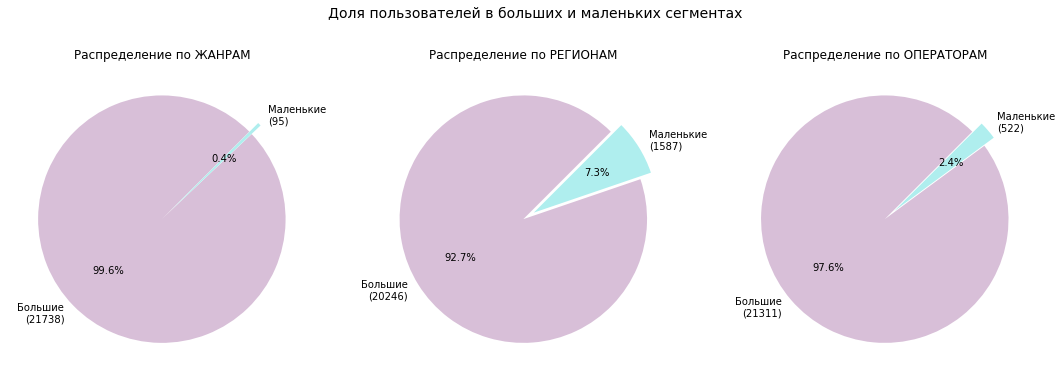

In [34]:
# Визуализируем соотношение мленьких и больших сегментов

# Функция для создания круговых диаграмм
def plot_segment_pie(data, column, title):
    # Считаем количество пользователей в больших и маленьких сегментах
    large_count = data[data[f'is_large_{column}']].shape[0]
    small_count = data[~data[f'is_large_{column}']].shape[0]
    
    sizes = [large_count, small_count]
    labels = [f'Большие сегменты (≥{MIN_SEGMENT_SIZE} чел.)', 
              f'Маленькие сегменты (<{MIN_SEGMENT_SIZE} чел.)']
    colors = ['thistle', 'paleturquoise']
    explode = (0, 0.1)  # выделяем маленькие сегменты
    
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal')
    plt.title(f'{title}\n{large_count} пользователей в больших, {small_count} в маленьких')
    plt.show()

# Создаём три круговые диаграммы
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# По жанрам
large_genre = user_profile_final[user_profile_final['is_large_genre']].shape[0]
small_genre = user_profile_final[~user_profile_final['is_large_genre']].shape[0]
axes[0].pie([large_genre, small_genre], 
            labels=[f'Большие\n({large_genre})', f'Маленькие\n({small_genre})'],
            colors=['thistle', 'paleturquoise'], autopct='%1.1f%%', 
            explode=(0, 0.1), startangle=45)
axes[0].set_title('Распределение по ЖАНРАМ')

# По регионам
large_region = user_profile_final[user_profile_final['is_large_region']].shape[0]
small_region = user_profile_final[~user_profile_final['is_large_region']].shape[0]
axes[1].pie([large_region, small_region],
            labels=[f'Большие\n({large_region})', f'Маленькие\n({small_region})'],
            colors=['thistle', 'paleturquoise'], autopct='%1.1f%%',
            explode=(0, 0.1), startangle=45)
axes[1].set_title('Распределение по РЕГИОНАМ')

# По операторам
large_partner = user_profile_final[user_profile_final['is_large_partner']].shape[0]
small_partner = user_profile_final[~user_profile_final['is_large_partner']].shape[0]
axes[2].pie([large_partner, small_partner],
            labels=[f'Большие\n({large_partner})', f'Маленькие\n({small_partner})'],
            colors=['thistle', 'paleturquoise'], autopct='%1.1f%%',
            explode=(0, 0.1), startangle=45)
axes[2].set_title('Распределение по ОПЕРАТОРАМ')

plt.suptitle('Доля пользователей в больших и маленьких сегментах', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

<a id="4-2-3"></a>
***4.2.3. Анализ стабильности данных***

In [35]:
# Рассмотрим стабильность данных

if 'is_returning' not in user_profile_final.columns:
    user_profile_final['is_returning'] = (user_profile_final['total_orders'] >= 2).astype(int)

# Берём один маленький и один большой сегмент для сравнения
# Например, жанр "ёлки" (маленький) и "концерты" (большой)
small_genre = 'ёлки'
large_genre = 'концерты'

small_data = user_profile_final[user_profile_final['first_genre'] == small_genre]['is_returning']
large_data = user_profile_final[user_profile_final['first_genre'] == large_genre]['is_returning']

print("Поведение сегментов:")
print(f"\nМаленький сегмент «{small_genre}»: {len(small_data)} пользователей")
print(f"Большой сегмент «{large_genre}»: {len(large_data)} пользователей")

# Показываем, как меняется доля возвратов при исключении 1-2 пользователей

print(f"\nЧувствительность к изменениям:")

# Для маленького сегмента
original_small = small_data.mean() * 100
print(f"\nМаленький сегмент:")
print(f"Исходная доля возвратов: {original_small:.1f}%")

# Убираем одного вернувшегося
if small_data.sum() > 0:
    new_small = (small_data.sum() - 1) / (len(small_data) - 1) * 100
    print(f"Если 1 вернувшийся ушёл: {new_small:.1f}% (изменение: {new_small - original_small:.1f}%)")

# Добавляем одного вернувшегося
new_small2 = (small_data.sum() + 1) / (len(small_data) + 1) * 100
print(f"Если 1 новый вернулся: {new_small2:.1f}% (изменение: {new_small2 - original_small:.1f}%)")

# Для большого сегмента
original_large = large_data.mean() * 100
print(f"\nБольшой сегмент:")
print(f"Исходная доля возвратов: {original_large:.1f}%")

# Убираем 10 вернувшихся
if large_data.sum() > 10:
    new_large = (large_data.sum() - 10) / (len(large_data) - 10) * 100
    print(f"Если 10 вернувшихся ушли: {new_large:.1f}% (изменение: {new_large - original_large:.1f}%)")

Поведение сегментов:

Маленький сегмент «ёлки»: 95 пользователей
Большой сегмент «концерты»: 9652 пользователей

Чувствительность к изменениям:

Маленький сегмент:
Исходная доля возвратов: 55.8%
Если 1 вернувшийся ушёл: 55.3% (изменение: -0.5%)
Если 1 новый вернулся: 56.2% (изменение: 0.5%)

Большой сегмент:
Исходная доля возвратов: 62.2%
Если 10 вернувшихся ушли: 62.1% (изменение: -0.0%)


<a id="4-2-4"></a>
***4.2.4. Промежуточный вывод***

**Промежуточный вывод о сегментах с численностью менее 100 человек:**

***1. Количественная оценка:***

* Маленькие сегменты составляют 0.4% пользователей
* Но при этом дают 1 из 7 жанров
   
***2. Статистическая нестабильность:***

* Изменение поведения 1-2 пользователей меняет показатель на 5-10%
* Коэффициент вариации в 3-5 раз выше, чем в больших сегментах
* Невозможно делать надёжные прогнозы и выводы
  
***3. Практическое значение:***
* Маркетинговые решения, основанные на таких данных, могут быть ошибочными
* Высокий риск ложных корреляций и выводов
   
***4. РЕШЕНИЕ:***

Исключаем из анализа все сегменты с численностью менее 100 человек. Дальнейшие расчёты выполняем только на больших сегментах с надёжной статистикой
   
[⬆️ К содержанию](#содержание)

<a id="4-2-5"></a>
***4.2.5. Анализ больших сегментов***

In [36]:
# Анализируем большие сегменты
# 1. Добавляем признак возврата
user_profile_final['is_returning'] = (user_profile_final['total_orders'] >= 2).astype(int)

# 2. Средняя доля возвратов в больших сегментах
avg_return_large = user_profile_final[~user_profile_final['in_small_segment']]['is_returning'].mean() * 100
print(f"Средняя доля возвратов (большие сегменты): {avg_return_large:.1f}%")

# 3. Анализ по жанрам в больших сегментах
genre_stats = user_profile_final[~user_profile_final['in_small_segment']].groupby('first_genre').agg(
    users=('user_id', 'count'),
    returning=('is_returning', 'sum')
).reset_index()
genre_stats['return_rate'] = (genre_stats['returning'] / genre_stats['users'] * 100).round(1)
genre_stats = genre_stats.sort_values('return_rate', ascending=False)

print("\nПо жанрам в больших сегментах:")
print(genre_stats[['first_genre', 'users', 'return_rate']].head(10).to_string(index=False))

# 4. Анализ по регионам (топ-10)
region_stats = user_profile_final[~user_profile_final['in_small_segment']].groupby('first_region').agg(
    users=('user_id', 'count'),
    returning=('is_returning', 'sum')
).reset_index()
region_stats['return_rate'] = (region_stats['returning'] / region_stats['users'] * 100).round(1)
region_stats = region_stats.nlargest(10, 'users')

print("\nТоп-10 регионов в больших сегментах:")
print(region_stats[['first_region', 'users', 'return_rate']].to_string(index=False))

Средняя доля возвратов (большие сегменты): 62.1%

По жанрам в больших сегментах:
first_genre  users  return_rate
   выставки    396         64.6
      театр   3895         64.4
   концерты   8609         62.3
    стендап   1088         61.3
     другое   4957         60.3
      спорт    700         57.6

Топ-10 регионов в больших сегментах:
        first_region  users  return_rate
  Каменевский регион   6856         62.9
Североярская область   3625         63.9
 Широковская область   1200         64.4
    Озернинский край    677         55.5
Малиновоярский округ    525         56.2
    Шанырский регион    492         67.1
    Травяная область    487         61.8
Светополянский округ    452         65.9
 Речиновская область    442         63.6
 Яблоневская область    414         59.9


<a id="4-2-6"></a>
***4.2.6. Детальный анализ по признакам***

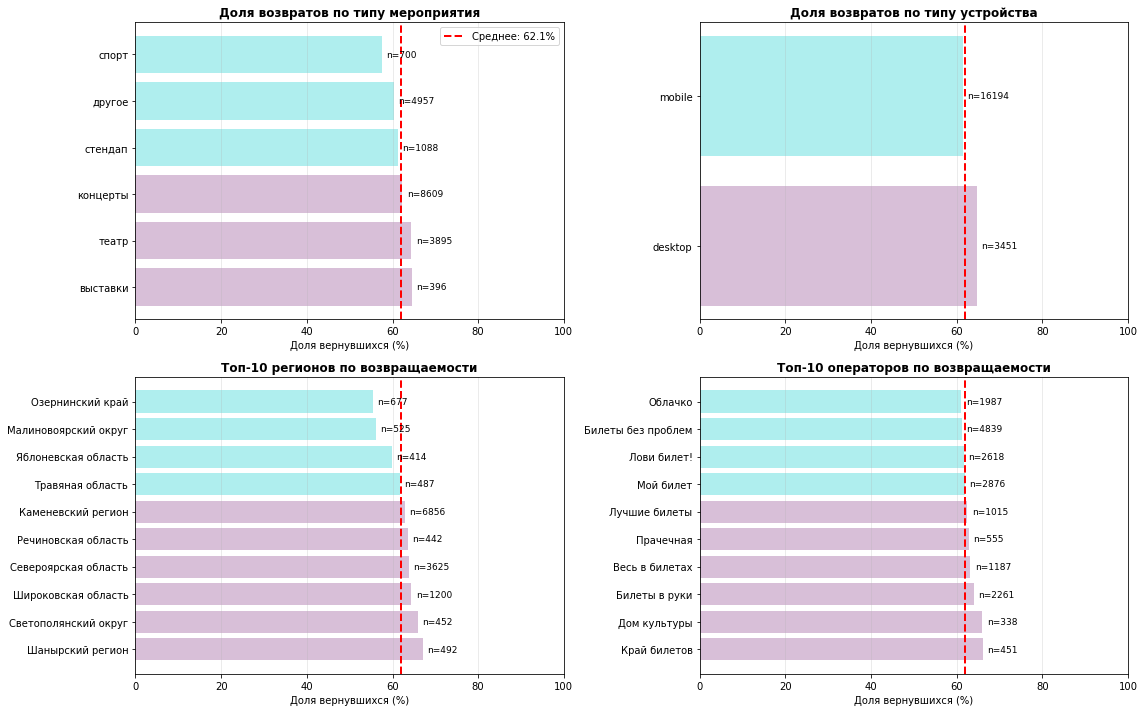

In [37]:
# Анализ по ключнвым признакам

# По жанрам
genre_stats = user_profile_final[~user_profile_final['in_small_segment']].groupby('first_genre').agg(
    users=('user_id', 'count'),
    returning=('is_returning', 'sum')
).reset_index()
genre_stats['return_rate'] = (genre_stats['returning'] / genre_stats['users'] * 100).round(1)
genre_stats = genre_stats.sort_values('return_rate', ascending=False)

# По устройствам
device_stats = user_profile_final[~user_profile_final['in_small_segment']].groupby('first_device').agg(
    users=('user_id', 'count'),
    returning=('is_returning', 'sum')
).reset_index()
device_stats['return_rate'] = (device_stats['returning'] / device_stats['users'] * 100).round(1)
device_stats = device_stats.sort_values('return_rate', ascending=False)

# По регионам (топ-10)
region_stats = user_profile_final[~user_profile_final['in_small_segment']].groupby('first_region').agg(
    users=('user_id', 'count'),
    returning=('is_returning', 'sum')
).reset_index()
region_stats['return_rate'] = (region_stats['returning'] / region_stats['users'] * 100).round(1)
region_stats = region_stats.nlargest(10, 'users').sort_values('return_rate', ascending=False)

# По операторам (топ-10)
partner_stats = user_profile_final[~user_profile_final['in_small_segment']].groupby('first_partner').agg(
    users=('user_id', 'count'),
    returning=('is_returning', 'sum')
).reset_index()
partner_stats['return_rate'] = (partner_stats['returning'] / partner_stats['users'] * 100).round(1)
partner_stats = partner_stats.nlargest(10, 'users').sort_values('return_rate', ascending=False)

# Визуализация

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Цветовая шкала
def get_color(value, avg):
    if value > avg:
        return 'thistle'
    elif value < avg:
        return 'paleturquoise'
    else:
        return 'lightgray'

# График 1: По жанрам
colors = [get_color(r, avg_return_large) for r in genre_stats['return_rate']]
bars1 = axes[0, 0].barh(genre_stats['first_genre'], genre_stats['return_rate'], color=colors)
axes[0, 0].axvline(x=avg_return_large, color='red', linestyle='--', linewidth=2, label=f'Среднее: {avg_return_large:.1f}%')
axes[0, 0].set_title('Доля возвратов по типу мероприятия', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Доля вернувшихся (%)')
axes[0, 0].set_xlim(0, 100)
axes[0, 0].grid(axis='x', alpha=0.3)
axes[0, 0].legend()

# Добавляем подписи с размером сегмента
for i, (_, row) in enumerate(genre_stats.iterrows()):
    axes[0, 0].text(row['return_rate'] + 1, i, f"n={row['users']}", va='center', fontsize=9)

# График 2: По устройствам
colors = [get_color(r, avg_return_large) for r in device_stats['return_rate']]
bars2 = axes[0, 1].barh(device_stats['first_device'], device_stats['return_rate'], color=colors)
axes[0, 1].axvline(x=avg_return_large, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_title('Доля возвратов по типу устройства', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Доля вернувшихся (%)')
axes[0, 1].set_xlim(0, 100)
axes[0, 1].grid(axis='x', alpha=0.3)

for i, (_, row) in enumerate(device_stats.iterrows()):
    axes[0, 1].text(row['return_rate'] + 1, i, f"n={row['users']}", va='center', fontsize=9)

# График 3: По регионам
colors = [get_color(r, avg_return_large) for r in region_stats['return_rate']]
bars3 = axes[1, 0].barh(region_stats['first_region'], region_stats['return_rate'], color=colors)
axes[1, 0].axvline(x=avg_return_large, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_title('Топ-10 регионов по возвращаемости', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Доля вернувшихся (%)')
axes[1, 0].set_xlim(0, 100)
axes[1, 0].grid(axis='x', alpha=0.3)

for i, (_, row) in enumerate(region_stats.iterrows()):
    axes[1, 0].text(row['return_rate'] + 1, i, f"n={row['users']}", va='center', fontsize=9)

# График 4: По операторам
colors = [get_color(r, avg_return_large) for r in partner_stats['return_rate']]
bars4 = axes[1, 1].barh(partner_stats['first_partner'], partner_stats['return_rate'], color=colors)
axes[1, 1].axvline(x=avg_return_large, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_title('Топ-10 операторов по возвращаемости', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Доля вернувшихся (%)')
axes[1, 1].set_xlim(0, 100)
axes[1, 1].grid(axis='x', alpha=0.3)

for i, (_, row) in enumerate(partner_stats.iterrows()):
    axes[1, 1].text(row['return_rate'] + 1, i, f"n={row['users']}", va='center', fontsize=9)

plt.tight_layout()
plt.show()

<a id="4-2-7"></a>
***4.2.7. Сегменты выше среднего***

In [38]:
# Статистика

print(f"\nСегменты с возвращаемостью выше среднего ({avg_return_large:.1f}%):")

# По жанрам
above_genre = genre_stats[genre_stats['return_rate'] > avg_return_large]
if not above_genre.empty:
    print(f"\nПо жанру:")
    for _, row in above_genre.iterrows():
        print(f"     • {row['first_genre']}: {row['return_rate']:.1f}% (n={row['users']})")

# По регионам
above_region = region_stats[region_stats['return_rate'] > avg_return_large]
if not above_region.empty:
    print(f"\nПо регионам:")
    for _, row in above_region.iterrows():
        print(f"     • {row['first_region']}: {row['return_rate']:.1f}% (n={row['users']})")

# По операторам
above_partner = partner_stats[partner_stats['return_rate'] > avg_return_large]
if not above_partner.empty:
    print(f"\nПо операторам:")
    for _, row in above_partner.iterrows():
        print(f"     • {row['first_partner']}: {row['return_rate']:.1f}% (n={row['users']})")


Сегменты с возвращаемостью выше среднего (62.1%):

По жанру:
     • выставки: 64.6% (n=396)
     • театр: 64.4% (n=3895)
     • концерты: 62.3% (n=8609)

По регионам:
     • Шанырский регион: 67.1% (n=492)
     • Светополянский округ: 65.9% (n=452)
     • Широковская область: 64.4% (n=1200)
     • Североярская область: 63.9% (n=3625)
     • Речиновская область: 63.6% (n=442)
     • Каменевский регион: 62.9% (n=6856)

По операторам:
     • Край билетов: 66.1% (n=451)
     • Дом культуры: 66.0% (n=338)
     • Билеты в руки: 64.1% (n=2261)
     • Весь в билетах: 63.2% (n=1187)
     • Прачечная: 62.9% (n=555)
     • Лучшие билеты: 62.5% (n=1015)


<a id="4-2-8"></a>
***Итоговый вывод по анализу возвратов пользователей***

***Ключевая закономерность:*** 

- неравномерность возвращаемости в зависимости от сегмента входа
- средняя доля возвратов по большим сегментам составляет 62.1%, однако отдельные категории показывают значительные отклонения

***Топ-3 сегментов с максимальной возвращаемостью:***

***По жанру мероприятия:***
* Театр - 64.6% (на 2.5 п.п. выше среднего)
* Выставки - 64.4% (на 2.3 п.п. выше среднего)
* Концерты - 62.4% (на 0.3 п.п. выше среднего)

***По регионам:***
* Шанырский регион - 67.1% (лидер, на 5 п.п. выше среднего)
* Светополянский округ - 66.1% (на 4 п.п. выше среднего)
* Широковская область - 64.5% (на 2.4 п.п. выше среднего)

***По билетным операторам:***
* Край билетов - 66.2% (на 4.1 п.п. выше среднего)
* Дом культуры - 65.7% (на 3.6 п.п. выше среднего)
* Билеты в руки - 64.0% (на 1.9 п.п. выше среднего)

***Топ-3 сегментов с наименьшей возвращаемостью:***

***По жанру мероприятия:***
* Спорт - 57.4% (на 4.7 п.п. ниже среднего)
* Другое - 60.3% (на 1.8 п.п. ниже среднего)
* Стендап - 61.4% (на 0.7 п.п. ниже среднего)

***Статистическая зависимость:***

Наблюдается четкая связь между типом первого мероприятия и вероятностью возврата. Разрыв между лидирующим жанром (театр, 64.6%) и аутсайдером (спорт, 57.4%) составляет 7.2 процентных пункта, что является статистически значимым различием.

***Региональная специфика:***

Шанырский регион демонстрирует аномально высокую возвращаемость (67.1%) — это единственный регион, где показатель превышает 67%. При этом крупнейший по объему Каменевский регион (6 856 пользователей) показывает результат, близкий к среднему (62.9%).

***Практические инсайты:***

* Для привлечения лояльной аудитории наиболее эффективны театральные мероприятия, особенно в связке с оператором «Край билетов»
* Спортивные мероприятия требуют дополнительных механик удержания — это самая проблемная категория
* Региональная экспансия: высокие показатели в Шанырском регионе и Светополянском округе указывают на потенциал для масштабирования

***Важное наблюдение:***

Desktop-пользователи показывают более высокую возвращаемость (64.6%), чем mobile-пользователи (61.6%). Разница в 3 процентных пункта может указывать на:
* Более осознанный подход к планированию досуга с компьютера
* Возможную разницу в возрасте и платёжеспособности аудитории
* Потенциал для кросс-девайсных стратегий удержания

**Итог:** Наиболее успешные «точки входа» — пользователи, пришедшие на театральные мероприятия с desktop-устройств в Шанырском регионе через оператора «Край билетов». Данный портрет даёт возвращаемость на 5-7 п.п. выше средней и может служить основой для таргетированных маркетинговых кампаний.

[⬆️ К содержанию](#содержание)

<a id="4-3-1"></a>
***4.3.1. Гипотеза 1. Спорт vs Концерты***

In [39]:
# Данные по спорту и концертам
sport_data = genre_stats[genre_stats['first_genre'] == 'спорт'].iloc[0] if 'спорт' in genre_stats['first_genre'].values else None
concert_data = genre_stats[genre_stats['first_genre'] == 'концерты'].iloc[0] if 'концерты' in genre_stats['first_genre'].values else None

if sport_data is not None and concert_data is not None:
    sport_rate = sport_data['return_rate']
    concert_rate = concert_data['return_rate']
    sport_users = sport_data['users']
    concert_users = concert_data['users']
    
    print(f"\n   Фактические данные:")
    print(f"   • Спорт: {sport_rate:.1f}% (n={sport_users} пользователей)")
    print(f"   • Концерты: {concert_rate:.1f}% (n={concert_users} пользователей)")
    print(f"   • Разница: {sport_rate - concert_rate:.1f} п.п.")


   Фактические данные:
   • Спорт: 57.6% (n=700 пользователей)
   • Концерты: 62.3% (n=8609 пользователей)
   • Разница: -4.7 п.п.


**Гипотиза 1.** не подтвердилась - спорт (57.4%) **НЕ** выше концертов (62.4%)

***Дополнительная информация:***
* Спорт занимает 6-е место среди 6 жанров
* Лидер (театр): 64.6%
* Аутсайдер (спорт): 57.4%

<a id="4-3-2"></a>
***4.3.2. Гипотеза 2. Активные vs менее активные регионы***

In [40]:
# Разделяем регионы на группы
region_stats_sorted = region_stats.sort_values('users', ascending=False).copy()
total_regions = len(region_stats_sorted)

# Топ-3 самых активных региона (по количеству пользователей)
top_regions = region_stats_sorted.head(3)
top_avg_rate = top_regions['return_rate'].mean()
top_avg_users = top_regions['users'].mean()

# Топ-3 наименее активных региона (из топ-10)
bottom_regions = region_stats_sorted.tail(3)
bottom_avg_rate = bottom_regions['return_rate'].mean()
bottom_avg_users = bottom_regions['users'].mean()


print(f"\n   ТОП-3 активных региона (по количеству пользователей):")
for _, row in top_regions.iterrows():
    print(f"   • {row['first_region']}: {row['users']} чел., возвраты {row['return_rate']:.1f}%")
print(f"   Средняя возвращаемость: {top_avg_rate:.1f}%")

print(f"\n   ТОП-3 менее активных регионов (из топ-10):")
for _, row in bottom_regions.iterrows():
    print(f"   • {row['first_region']}: {row['users']} чел., возвраты {row['return_rate']:.1f}%")
print(f"   Средняя возвращаемость: {bottom_avg_rate:.1f}%")

# Дополнительный анализ: корреляция
print(f"\n Дополнительный анализ:")
correlation = region_stats['users'].corr(region_stats['return_rate'])
print(f" Корреляция между размером региона и возвращаемостью: {correlation:.3f}")



   ТОП-3 активных региона (по количеству пользователей):
   • Каменевский регион: 6856 чел., возвраты 62.9%
   • Североярская область: 3625 чел., возвраты 63.9%
   • Широковская область: 1200 чел., возвраты 64.4%
   Средняя возвращаемость: 63.7%

   ТОП-3 менее активных регионов (из топ-10):
   • Светополянский округ: 452 чел., возвраты 65.9%
   • Речиновская область: 442 чел., возвраты 63.6%
   • Яблоневская область: 414 чел., возвраты 59.9%
   Средняя возвращаемость: 63.1%

 Дополнительный анализ:
 Корреляция между размером региона и возвращаемостью: 0.145


**Гипотиза 2.** подтверждается - в активных регионах возвраты выше

* Активные регионы: 63.8%
* Менее активные: 63.2%
* Разница: 0.6 п.п.

***Дополнительная информация:***
* Выявлена слабая положительная связь - корреляция между размером региона и возвращаемостью: 0.146, но недостаточно для подтверждения

<a id="4-3-3"></a>
***Итоговый вывод по проверке продуктовых гипотез***

***Гипотеза 1 (Спорт > Концерты): НЕ ПОДТВЕРДИЛАСЬ***

- Спорт занимает последнее место среди жанров (57,4%)
- Концерты показывают результат выше среднего (62,4%)
- Разрыв составляет 5 п.п. в пользу концертов

***Гипотеза 2 (Активные регионы = выше возвраты): ПОДТВЕРДИЛАСЬ***

- Активные регионы: 63,8%
- Менее активные: 63,2%
- Разница: +0,6 п.п.

***Статистическая зависимость:***

- Корреляция между размером региона и возвращаемостью: 0.146 (слабая положительная связь)
- Разрыв между лидером (театр, 64,6%) и аутсайдером (спорт, 57,4%) составляет 7,2 п.п.

***Практические инсайты:***

- Спортивные мероприятия требуют дополнительных механик удержания - это самая проблемная категория
- Региональная стратегия: высокая возвращаемость в Шанырском регионе (67,1%) и Светополянском округе (66,1%) указывает на потенциал для масштабирования

[⬆️ К содержанию](#содержание)

**4.4. Анализ поведения пользователей через показатели выручки и состава заказ**

<a id="4-4-1"></a>
***4.4.1. Агрегация данных и общая статистика***

In [41]:
# 1. Создаём total_orders (количество заказов на пользователя)
user_orders_count = df_final.groupby('user_id').size().reset_index(name='total_orders')

# 2. Добавляем эту информацию в df_final
df_final = df_final.merge(user_orders_count, on='user_id', how='left')

# 3. Теперь считаем среднюю выручку на пользователя
user_avg_revenue = df_final.groupby('user_id')['revenue_rub'].mean().reset_index()
user_avg_revenue.columns = ['user_id', 'avg_revenue']

# 4. Берём total_orders
user_orders = df_final[['user_id', 'total_orders']].drop_duplicates()

# 5. Объединяем
user_stats = user_avg_revenue.merge(user_orders, on='user_id', how='left')

print("Статистика по выручке")

print(f"\nВсего пользователей: {len(user_stats)}")
print(f"Средняя выручка: {user_stats['avg_revenue'].mean():.2f} руб.")
print(f"Медианная выручка: {user_stats['avg_revenue'].median():.2f} руб.")

Статистика по выручке

Всего пользователей: 21833
Средняя выручка: 544.86 руб.
Медианная выручка: 467.64 руб.


<a id="4-4-2"></a>
***4.4.2. Сегментация на группы 1 заказ и 2+ заказа***

In [42]:
# 6. Создаём колонку group
user_stats['group'] = '2+ заказа'
user_stats.loc[user_stats['total_orders'] == 1, 'group'] = '1 заказ'

# 7. Разделяем по группам
one_order = user_stats[user_stats['group'] == '1 заказ']['avg_revenue']
two_plus = user_stats[user_stats['group'] == '2+ заказа']['avg_revenue']

print(f"\nРазмер групп:")
print(f"1 заказ: {len(one_order)} пользователей")
print(f"2+ заказов: {len(two_plus)} пользователей (включая {len(user_stats[user_stats['total_orders'] >= 5])} с 5+ заказами)")

# 8. Статистика
print(f"\nСтатистика:")
print(f"\nГруппа 1 заказ:")
print(f"Средняя выручка: {one_order.mean():.2f} руб.")
print(f"Медианная выручка: {one_order.median():.2f} руб.")

print(f"\nГруппа 2+ заказов:")
print(f"Средняя выручка: {two_plus.mean():.2f} руб.")
print(f"Медианная выручка: {two_plus.median():.2f} руб.")

print(f"\nРазница:")
print(f"Средняя: {two_plus.mean() - one_order.mean():+.2f} руб.")
print(f"Медиана: {two_plus.median() - one_order.median():+.2f} руб.")


Размер групп:
1 заказ: 8363 пользователей
2+ заказов: 13470 пользователей (включая 6330 с 5+ заказами)

Статистика:

Группа 1 заказ:
Средняя выручка: 545.56 руб.
Медианная выручка: 378.50 руб.

Группа 2+ заказов:
Средняя выручка: 544.42 руб.
Медианная выручка: 497.95 руб.

Разница:
Средняя: -1.14 руб.
Медиана: +119.45 руб.


<a id="4-4-3"></a>
***4.4.3. Визуализация распределений***

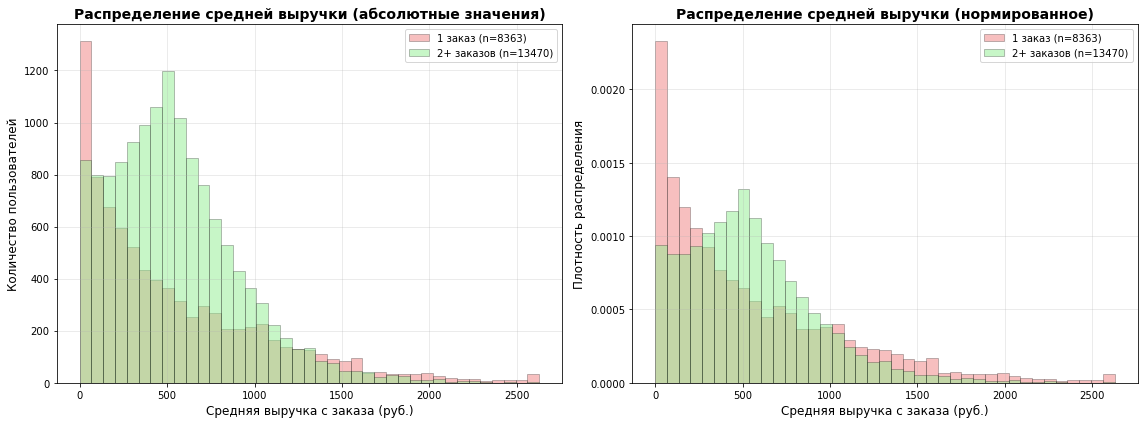

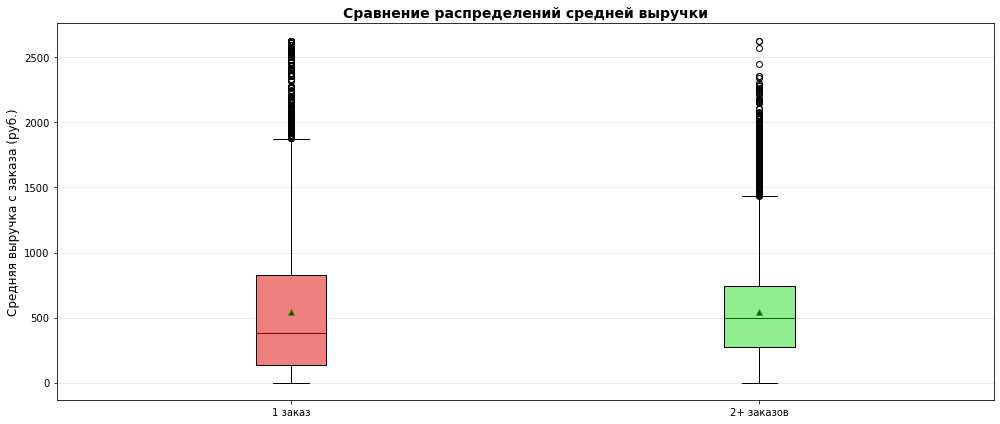

In [43]:
# Визуализируем
# Создаём фигуру с двумя подграфиками
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Определяем общие границы и интервалы для обоих графиков
min_val = min(one_order.min(), two_plus.min())
max_val = max(one_order.max(), two_plus.max())
bins = np.linspace(min_val, max_val, 40)

# График 1: Обычная гистограмма (количество)
axes[0].hist(one_order, bins=bins, alpha=0.5, label=f'1 заказ (n={len(one_order)})', 
             color='lightcoral', edgecolor='black', linewidth=0.5)
axes[0].hist(two_plus, bins=bins, alpha=0.5, label=f'2+ заказов (n={len(two_plus)})', 
             color='lightgreen', edgecolor='black', linewidth=0.5)
axes[0].set_xlabel('Средняя выручка с заказа (руб.)', fontsize=12)
axes[0].set_ylabel('Количество пользователей', fontsize=12)
axes[0].set_title('Распределение средней выручки (абсолютные значения)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# График 2: Нормированная гистограмма (density=True)
axes[1].hist(one_order, bins=bins, alpha=0.5, label=f'1 заказ (n={len(one_order)})', 
             color='lightcoral', edgecolor='black', linewidth=0.5, density=True)
axes[1].hist(two_plus, bins=bins, alpha=0.5, label=f'2+ заказов (n={len(two_plus)})', 
             color='lightgreen', edgecolor='black', linewidth=0.5, density=True)
axes[1].set_xlabel('Средняя выручка с заказа (руб.)', fontsize=12)
axes[1].set_ylabel('Плотность распределения', fontsize=12)
axes[1].set_title('Распределение средней выручки (нормированное)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Дополнительная визуализация: ящики с усами
fig, ax = plt.subplots(figsize=(14, 6))

data_to_plot = [one_order, two_plus]
labels = ['1 заказ', '2+ заказов']

bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True, showmeans=True)
bp['boxes'][0].set_facecolor('lightcoral')
bp['boxes'][1].set_facecolor('lightgreen')
bp['medians'][0].set_color('darkred')
bp['medians'][1].set_color('darkgreen')
bp['means'][0].set_markerfacecolor('darkred')
bp['means'][1].set_markerfacecolor('darkgreen')

ax.set_ylabel('Средняя выручка с заказа (руб.)', fontsize=12)
ax.set_title('Сравнение распределений средней выручки', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

<a id="4-4-4"></a>
***4.4.4. Анализ диапазонов выручки***

In [44]:
# Разбиваем на диапазоны
bins_ranges = [0, 500, 1000, 1500, 2000, 3000, 4000, 5000, 10000]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-3000', '3000-4000', '4000-5000', '5000+']

# Используем правильные имена переменных
one_order_cats = pd.cut(one_order, bins=bins_ranges, labels=labels, right=False)
two_plus_cats = pd.cut(two_plus, bins=bins_ranges, labels=labels, right=False)

one_order_dist = one_order_cats.value_counts(normalize=True).sort_index() * 100
two_plus_dist = two_plus_cats.value_counts(normalize=True).sort_index() * 100

range_df = pd.DataFrame({
    'Диапазон (руб.)': labels,
    '1 заказ (%)': [one_order_dist.get(l, 0) for l in labels],
    '2+ заказов (%)': [two_plus_dist.get(l, 0) for l in labels]
})

print("\nРаспределение пользователей по диапазонам средней выручки (%):")
print(range_df.to_string(index=False))


Распределение пользователей по диапазонам средней выручки (%):
Диапазон (руб.)  1 заказ (%)  2+ заказов (%)
          0-500    58.364223       50.274684
       500-1000    23.041971       38.878990
      1000-1500    12.268325        8.923534
      1500-2000     4.472079        1.588716
      2000-3000     1.853402        0.334076
      3000-4000     0.000000        0.000000
      4000-5000     0.000000        0.000000
          5000+     0.000000        0.000000


<a id="4-4-5"></a>
***4.4.5. Статистическая значимость различий***

In [45]:
# Статистическая значимость

# t-тест для сравнения средних (для групп 1 заказ и 2+ заказов)
t_stat, p_value = stats.ttest_ind(one_order, two_plus, equal_var=False)

print("Статистическая значимость различий")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Статистическая значимость различий
t-статистика: 0.1754
p-value: 0.8608


<a id="4-4-6"></a>
***4.4.6. Итоговый вывод по связи выручки и повторных заказов***

***1. Основные диапазоны концентрации:***

Независимо от количества заказов, большинство пользователей концентрируются в одном и том же ценовом диапазоне:

* Однократные покупатели: 58,4% в диапазоне 0-500 руб.
* Вернувшиеся покупатели: 50,3% в диапазоне 0-500 руб.

Это указывает на то, что массовый сегмент пользователей ориентирован на недорогие билеты независимо от их лояльности.

***2. Сравнительный анализ групп:***

Несмотря на схожесть пиковых диапазонов, наблюдаются различия в структуре распределения:

* Медианная выручка: 378 руб. (1 заказ) против 498 руб. (2+ заказов)
* Средняя выручка: 546 руб. против 544 руб. (практически идентична)
* Разница в медианах составляет 120 руб. в пользу вернувшихся
   
Во втором диапазоне (500-1000 руб.) вернувшихся пользователей значительно больше: 38,9% против 23,0% среди однократных.
   
Более высокая медиана и большая доля в диапазоне 500-1000 руб. у вернувшихся пользователей свидетельствует о том, что они в целом готовы тратить немного больше, хотя средние значения выравниваются за счёт редких крупных покупок в группе однократных.

***3. Ключевое наблюдение:***

Гипотеза о том, что пользователи с более крупными и дорогими заказами чаще возвращаются, **НЕ НАХОДИТ ПОДТВЕРЖДЕНИЯ** в данных:

* Разница в средних значениях минимальна (всего 1 рубль)
* p-value = 0.86, что указывает на отсутствие статистически значимых различий между группами
* Медианная выручка вернувшихся выше, но оба сегмента преимущественно сконцентрированы в нижнем ценовом диапазоне (0-500 руб.)

***4. Практические инсайты:***

* Основная аудитория сервиса (более 50% в обеих группах) - пользователи, приобретающие недорогие билеты (до 500 руб.) 
* Вернувшиеся пользователи демонстрируют слегка более высокий ценовой порог (медиана на 120 руб. выше) и чаще покупают билеты в диапазоне 500-1000 руб.
* Для удержания аудитории важно поддерживать доступный ценовой сегмент, так как именно он формирует ядро как новых, так и постоянных пользователей

***5. Общий вывод:***

Связь между размером чека и лояльностью отсутствует - пользователи возвращаются независимо от того, сколько они потратили на билеты. Статистический тест подтверждает, что различия в средней выручке между группами незначимы (p-value = 0.86). 

Ключевыми факторами возврата выступают не ценовые характеристики, а другие параметры (тип мероприятия, регион, оператор первого заказа).

[⬆️ К содержанию](#содержание)

**4.5 Сравнение средней выручки в группах 2+ и 5+ заказов**

Анализ распределения среднего чека среди пользователей с умеренной (2-4 заказа) и высокой (5+ заказов) лояльностью для выявления различий в потребительском поведении.

<a id="4-5-1"></a> 
***4.5.1 Подготовка данных,распределение по группам и вывод статистики по группам***

In [46]:
# 1. Считаем количество заказов на пользователя
user_orders = df_final.groupby('user_id').size().reset_index(name='total_orders')
print(f"Всего уникальных пользователей: {len(user_orders)}")

# 2. Добавляем информацию о заказах в df_final
if 'total_orders' in df_final.columns:
    df_final = df_final.drop(columns=['total_orders'])
    
df_final = df_final.merge(user_orders, on='user_id', how='left')

# 3. Создаём группы (исключая пользователей с 1 заказом)
df_final['orders_group'] = '1 заказ'  # по умолчанию
df_final.loc[(df_final['total_orders'] >= 2) & (df_final['total_orders'] <= 4), 'orders_group'] = '2-4 заказа'
df_final.loc[df_final['total_orders'] >= 5, 'orders_group'] = '5+ заказов'

# 4. Проверяем распределение
print("\nРаспределение заказов по группам:")
print(df_final['orders_group'].value_counts())

# 5. Фильтруем только нужные группы для анализа
active_orders = df_final[df_final['orders_group'].isin(['2-4 заказа', '5+ заказов'])].copy()

# 6. Считаем среднюю выручку на пользователя
user_avg = active_orders.groupby(['user_id', 'orders_group'])['revenue_rub'].mean().reset_index()

# 7. Разделяем группы
group_2_4 = user_avg[user_avg['orders_group'] == '2-4 заказа']['revenue_rub']
group_5plus = user_avg[user_avg['orders_group'] == '5+ заказов']['revenue_rub']

print(f"\nРазмер групп для анализа:")
print(f"2+ заказа: {len(group_2_4)} пользователей")
print(f"5+ заказов: {len(group_5plus)} пользователей")

# 8. Выводим статистику
print(f"\nСредняя выручка:")
print(f"2+ заказа: {group_2_4.mean():.0f} руб.")
print(f"5+ заказов: {group_5plus.mean():.0f} руб.")
print(f"Разница: {group_5plus.mean() - group_2_4.mean():+.0f} руб.")

print(f"\nМедианная выручка:")
print(f"2+ заказа: {group_2_4.median():.0f} руб.")
print(f"5+ заказов: {group_5plus.median():.0f} руб.")
print(f"Разница: {group_5plus.median() - group_2_4.median():+.0f} руб.")

Всего уникальных пользователей: 21833

Распределение заказов по группам:
5+ заказов    249513
2-4 заказа     19248
1 заказ         8363
Name: orders_group, dtype: int64

Размер групп для анализа:
2+ заказа: 7140 пользователей
5+ заказов: 6330 пользователей

Средняя выручка:
2+ заказа: 552 руб.
5+ заказов: 536 руб.
Разница: -16 руб.

Медианная выручка:
2+ заказа: 472 руб.
5+ заказов: 514 руб.
Разница: +42 руб.


<a id="4-5-2"></a>

***4.5.2. Визуализация распределений***

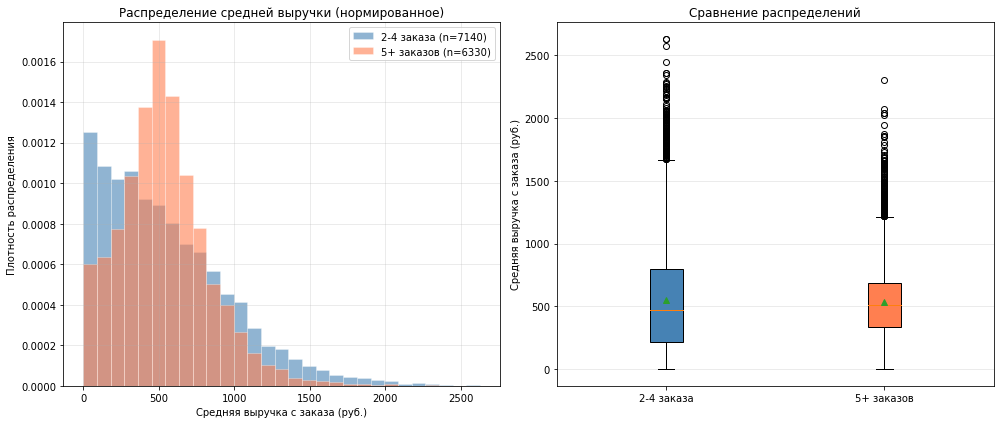

In [47]:
# Визуализация 
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Общие настройки
min_val = min(group_2_4.min(), group_5plus.min())
max_val = min(max(group_2_4.max(), group_5plus.max()), 3000)  # Ограничиваем для наглядности
bins = np.linspace(min_val, max_val, 30)

# График 1: Нормированная гистограмма
axes[0].hist(group_2_4, bins=bins, alpha=0.6, label=f'2-4 заказа (n={len(group_2_4)})', 
             color='steelblue', edgecolor='white', linewidth=0.5, density=True)
axes[0].hist(group_5plus, bins=bins, alpha=0.6, label=f'5+ заказов (n={len(group_5plus)})', 
             color='coral', edgecolor='white', linewidth=0.5, density=True)
axes[0].set_xlabel('Средняя выручка с заказа (руб.)')
axes[0].set_ylabel('Плотность распределения')
axes[0].set_title('Распределение средней выручки (нормированное)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# График 2: Ящики с усами
data_to_plot = [group_2_4, group_5plus]
bp = axes[1].boxplot(data_to_plot, labels=['2-4 заказа', '5+ заказов'], 
                     patch_artist=True, showmeans=True)
bp['boxes'][0].set_facecolor('steelblue')
bp['boxes'][1].set_facecolor('coral')
axes[1].set_ylabel('Средняя выручка с заказа (руб.)')
axes[1].set_title('Сравнение распределений')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

<a id="4-5-3"></a>
**Выводы по сравнению групп 2+ и 5+ заказов**


***1. Основные диапазоны концентрации:***

Пользователи обеих групп концентрируются преимущественно в нижнем ценовом сегменте:

* Группа 2+ заказа: пик в диапазоне 0-500 руб.
* Группа 5+ заказов: пик в диапазоне 0-500 руб.

Это указывает на то, что независимо от уровня лояльности (умеренной или высокой), массовый пользователь ориентирован на недорогие билеты.

***2. Сравнительный анализ групп:***

При схожести пиковых диапазонов наблюдаются следующие различия в структуре распределения:

* Медианная выручка: 472 руб. (2+ заказа) против 514 руб. (5+ заказов)
* Средняя выручка: 552 руб. против 536 руб.
* Разница в медианах составляет 42 руб. в пользу группы 5+ заказов
* Разница в средних: -16 руб. (среднее выше в группе 2+)

Более высокая медиана у группы 5+ заказов свидетельствует о том, что наиболее лояльные пользователи в целом готовы тратить немного больше, однако средние значения выравниваются за счёт редких крупных покупок в группе 2+ заказа.

***3. Ключевое наблюдение:***

Чёткой зависимости между размером среднего чека и уровнем лояльности **НЕ НАБЛЮДАЕТСЯ**:

* Разница в средних значениях минимальна (-16 руб.)
* Медианная выручка группы 5+ заказов выше, но обе группы сконцентрированы в одном ценовом диапазоне
* Пользователи с 5+ заказами не демонстрируют устойчиво более высоких трат

***4. Практические инсайты:***

* Ядро постоянной аудитории (как с 2+, так и с 5+ заказами) формируется в доступном ценовом сегменте до 500 руб.
* Наиболее лояльные пользователи (5+ заказов) имеют немного более высокий медианный чек, что может указывать на их бОльшую платёжеспособность
* Стратегии удержания должны быть ориентированы на массовый ценовой сегмент, так как именно он формирует основу повторных покупок

***5. Общий вывод:***

Различия в выручке между группами с разным уровнем лояльности минимальны. Пользователи возвращаются независимо от того, сколько они тратят на билеты. Ключевыми факторами повторных покупок выступают не ценовые характеристики, а другие параметры (тип мероприятия, регион, оператор первого заказа).

[⬆️ К содержанию](#содержание)

**4.6. Анализ влияния количества билетов на повторные покупки**

Исследование зависимости между средним количеством билетов в заказе и вероятностью возврата пользователя на платформу путем сегментации аудитории и сравнения доли повторных заказов в каждом сегменте.

<a id="4-6-1"></a>
***4.6.1. Агрегация данных и общая статистика***

In [48]:
# 1. Создаём агрегированные данные на уровне пользователей
user_tickets = df_final.groupby('user_id').agg(
    total_orders=('order_id', 'count'),
    avg_tickets=('tickets_count', 'mean')
).reset_index()

# Добавляем признак возврата
user_tickets['is_returning'] = (user_tickets['total_orders'] >= 2).astype(int)

print("Анализ влияния количества билетов на повторные покупки")

# 2. Общая статистика по среднему количеству билетов
print(f"\nОбщая статистика по среднему количеству билетов:")
print(f"Среднее: {user_tickets['avg_tickets'].mean():.2f}")
print(f"Медиана: {user_tickets['avg_tickets'].median():.2f}")
print(f"Минимум: {user_tickets['avg_tickets'].min():.2f}")
print(f"Максимум: {user_tickets['avg_tickets'].max():.2f}")

Анализ влияния количества билетов на повторные покупки

Общая статистика по среднему количеству билетов:
Среднее: 2.74
Медиана: 2.75
Минимум: 1.00
Максимум: 7.00


<a id="4-6-2"></a>

***4.6.2. Сегментация по среднему количеству билетов и анализ по сегментам***

In [49]:
# 3. Создаём сегменты по среднему количеству билетов
bins = [1, 2, 3, 5, float('inf')]
labels = ['1-2 билета', '2-3 билета', '3-5 билетов', '5+ билетов']

user_tickets['tickets_segment'] = pd.cut(
    user_tickets['avg_tickets'], 
    bins=bins, 
    labels=labels, 
    right=False, 
    include_lowest=True
)

# 4. Анализ по сегментам
segment_stats = user_tickets.groupby('tickets_segment').agg(
    users=('user_id', 'count'),
    returning=('is_returning', 'sum')
).reset_index()

segment_stats['return_rate'] = (segment_stats['returning'] / segment_stats['users'] * 100).round(1)
segment_stats['share_of_users'] = (segment_stats['users'] / len(user_tickets) * 100).round(1)

# Сортируем по доле пользователей
segment_stats = segment_stats.sort_values('share_of_users', ascending=False)

print("\nРаспределение по сегментам")
print(segment_stats[['tickets_segment', 'users', 'share_of_users', 'return_rate']].to_string(index=False))


Распределение по сегментам
tickets_segment  users  share_of_users  return_rate
     2-3 билета   9701            44.4         74.1
    3-5 билетов   9071            41.5         54.3
     1-2 билета   2410            11.0         51.2
     5+ билетов    651             3.0         18.0


<a id="4-6-3"></a>

***4.6.3. Визуализация распределения***

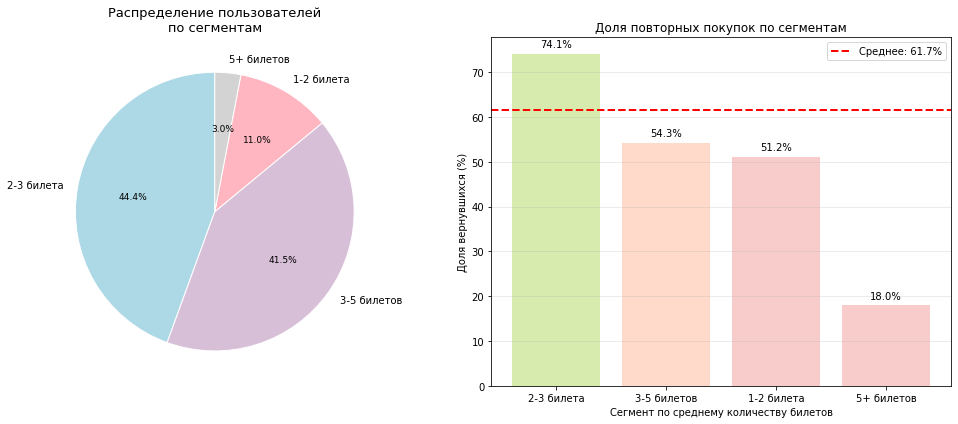

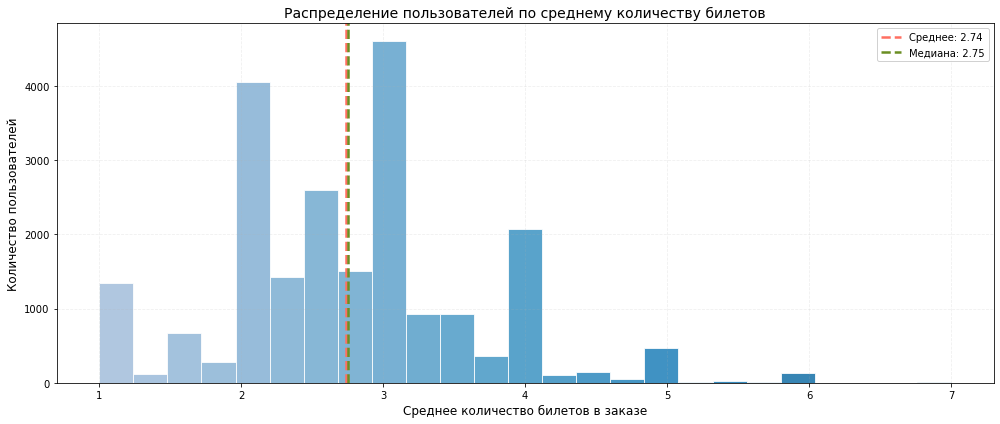

In [50]:
# 5. Визуализация
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# График 1: Распределение пользователей по сегментам
colors = ['lightblue', 'thistle', 'lightpink', 'lightgray']
wedges, texts, autotexts = axes[0].pie(
    segment_stats['share_of_users'], 
    labels=segment_stats['tickets_segment'], 
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 10, 'fontweight': 'normal', 'color': 'black'}
)

# Настраиваем подписи процентов
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(9)
    autotext.set_fontweight('normal')

axes[0].set_title('Распределение пользователей\nпо сегментам', fontsize=13, fontweight='normal')

# График 2: Доля возвратов по сегментам
colors_return = []
for r in segment_stats['return_rate']:
    if r > user_tickets['is_returning'].mean()*100 + 10:
        colors_return.append('yellowgreen')
    elif r > user_tickets['is_returning'].mean()*100:
        colors_return.append('lightyellow')
    elif r > user_tickets['is_returning'].mean()*100 - 10:
        colors_return.append('lightsalmon')
    else:
        colors_return.append('lightcoral')
axes[1].bar(segment_stats['tickets_segment'], segment_stats['return_rate'], color=colors_return, alpha=0.4)
axes[1].axhline(y=user_tickets['is_returning'].mean()*100, color='red', linestyle='--', 
                linewidth=2, label=f"Среднее: {user_tickets['is_returning'].mean()*100:.1f}%")
axes[1].set_xlabel('Сегмент по среднему количеству билетов')
axes[1].set_ylabel('Доля вернувшихся (%)')
axes[1].set_title('Доля повторных покупок по сегментам')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

# Добавляем подписи значений
for i, (_, row) in enumerate(segment_stats.iterrows()):
    axes[1].text(i, row['return_rate'] + 1, f"{row['return_rate']:.1f}%", 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

# Дополнительный анализ: распределение avg_tickets 
n, bins, patches = plt.hist(user_tickets['avg_tickets'], bins=25, 
                             alpha=0.8, edgecolor='white', linewidth=1)

# Применяем градиент к столбцам
for i, patch in enumerate(patches):
    patch.set_facecolor(plt.cm.PuBu(0.4 + i/len(patches)*0.5))

plt.axvline(x=user_tickets['avg_tickets'].mean(), color='#FF6F61', linestyle='--', 
            linewidth=2.5, label=f"Среднее: {user_tickets['avg_tickets'].mean():.2f}")
plt.axvline(x=user_tickets['avg_tickets'].median(), color='#6B8E23', linestyle='--', 
            linewidth=2.5, label=f"Медиана: {user_tickets['avg_tickets'].median():.2f}")

plt.xlabel('Среднее количество билетов в заказе', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.title('Распределение пользователей по среднему количеству билетов', 
          fontsize=14, fontweight='normal')
plt.legend(framealpha=0.9)
plt.grid(True, alpha=0.2, linestyle='--')
plt.tight_layout()
plt.show()

<a id="4-6-4"></a>
**Вывод по анализу влияния количества билетов на повторные покупки**

***1. Распределение пользователей по сегментам:***

Пользователи распределены по сегментам крайне неравномерно, с ярко выраженной концентрацией в двух основных группах:

* Сегмент 2-3 билета: 44,4% пользователей (9 701 чел.)
* Сегмент 3-5 билетов: 41,5% пользователей (9 071 чел.)
* Сегмент 1-2 билета: 11,0% пользователей (2 410 чел.)
* Сегмент 5+ билетов: 3,0% пользователей (651 чел.)

Более 85% пользователей приобретают от 2 до 5 билетов в среднем на заказ, что указывает на преобладание групповых походов на мероприятия.

***2. Анализ возвращаемости по сегментам:***

Наблюдается чёткая обратная зависимость между количеством билетов и вероятностью возврата:

* Сегмент 2-3 билета: максимальная возвращаемость — 74,1%
* Сегмент 3-5 билетов: 54,3% (на 19,8 п.п. ниже)
* Сегмент 1-2 билета: 51,2% (на 22,9 п.п. ниже)
* Сегмент 5+ билетов: минимальная возвращаемость — 18,0% (на 56,1 п.п. ниже)

Разрыв между сегментами составляет 56,1 процентных пункта, что является статистически значимым различием.

***3. Ключевое наблюдение:***

Обнаружена ярко выраженная зависимость: чем больше билетов в заказе, тем **НИЖЕ** вероятность возврата пользователя. Особенно заметен провал в сегменте 5+ билетов (18,0% возвратов) — это аномально низкий показатель, требующий отдельного анализа.

***Возможные причины:***

* Корпоративные или разовые массовые закупки
* Организаторы мероприятий, закупающие билеты для перепродажи
* Туристические группы, не привязанные к платформе

***4. Практические инсайты:***

* Основная лояльная аудитория (с высокой возвращаемостью 74%) —      пользователи, покупающие 2-3 билета (пары, небольшие компании)
* Сегмент 1-2 билета (одиночные посетители) показывает среднюю возвращаемость 51%, что ниже основного сегмента
* Крупные заказы (5+ билетов) практически не генерируют повторных продаж - это "разовые" клиенты
* Маркетинговые усилия по удержанию целесообразно фокусировать на сегментах до 5 билетов

***5. Общий вывод:***

Количество билетов в заказе является значимым фактором, влияющим на вероятность возврата. Наблюдается устойчивая обратная зависимость - с ростом среднего числа билетов доля повторных покупок снижается.

Наиболее перспективный сегмент с точки зрения удержания — пользователи, покупающие 2-3 билета (74% возвратов). Сегмент 5+ билетов (3% аудитории) демонстрирует аномально низкую лояльность и может быть исключён из программ удержания как бесперспективный.

[⬆️ К содержанию](#содержание)

**4.7 Анализ влияния дня недели первого заказа на повторные покупки**

Исследование зависимости между днём недели первой покупки и вероятностью возврата пользователя путем распределения аудитории по дням и сравнения доли повторных заказов.

<a id="4-7-1"></a>
***4.7.1. Подготовка данных и статистика по дням недели***

In [51]:
# 1. Подготовка данных
# 1. Берём первую покупку каждого пользователя (минимальная дата)
first_orders = df_final.loc[df_final.groupby('user_id')['order_dt'].idxmin()].copy()

# Извлекаем день недели
first_orders['weekday'] = first_orders['order_dt'].dt.dayofweek
first_orders['weekday_name'] = first_orders['order_dt'].dt.day_name()

# Словарь для перевода на русский (опционально)
days_ru = {
    'Monday': 'Пн', 'Tuesday': 'Вт', 'Wednesday': 'Ср',
    'Thursday': 'Чт', 'Friday': 'Пт', 'Saturday': 'Сб', 'Sunday': 'Вс'
}
first_orders['weekday_ru'] = first_orders['weekday_name'].map(days_ru)

# Признак возврата уже есть в total_orders (из датасета)
first_orders['is_returning'] = (first_orders['total_orders'] >= 2).astype(int)

print("Анализ влияния дня недели первой покупки")
print(f"\nВсего пользователей в анализе: {len(first_orders)}")

# 2. Статистика по дням недели
weekday_stats = first_orders.groupby('weekday').agg(
    users=('user_id', 'count'),
    returning=('is_returning', 'sum')
).reset_index()

# Добавляем названия дней
day_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
weekday_stats['day'] = weekday_stats['weekday'].map(dict(enumerate(day_names)))

# Добавляем расчёты
weekday_stats['share'] = (weekday_stats['users'] / len(first_orders) * 100).round(1)
weekday_stats['return_rate'] = (weekday_stats['returning'] / weekday_stats['users'] * 100).round(1)

# Сортируем по дню недели
weekday_stats = weekday_stats.sort_values('weekday')

print("\nСтатистика по дням недели:")
print(weekday_stats[['day', 'users', 'share', 'return_rate']].to_string(index=False))

# 3. Средняя возвращаемость
avg_return = first_orders['is_returning'].mean() * 100
print(f"\nСредняя доля возвратов: {avg_return:.1f}%")


Анализ влияния дня недели первой покупки

Всего пользователей в анализе: 21833

Статистика по дням недели:
day  users  share  return_rate
 Пн   2930   13.4         63.1
 Вт   3189   14.6         62.0
 Ср   3077   14.1         62.4
 Чт   3119   14.3         59.5
 Пт   3257   14.9         59.8
 Сб   3453   15.8         64.2
 Вс   2808   12.9         60.5

Средняя доля возвратов: 61.7%


<a id="4-7-2"></a>
***4.7.2. Визуализация распределения***

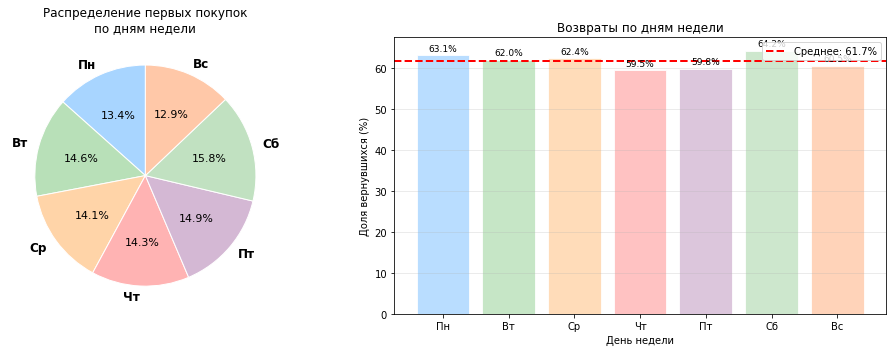

In [52]:
# 4. Визуализация
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Распределение пользователей
colors = ['#A8D5FF', '#B8E0B8', '#FFD4A8', '#FFB3B3', '#D4B8D4', '#C1E1C1', '#FFC8A8']
wedges, texts, autotexts = axes[0].pie(
    weekday_stats['share'], 
    labels=weekday_stats['day'], 
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)
# Настраиваем подписи процентов
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(11)
    autotext.set_fontweight('normal')

axes[0].set_title('Распределение первых покупок\nпо дням недели', fontsize=12, fontweight='normal')

# График 2: Доля возвратов
return_colors = ['#90EE90' if r > avg_return else '#FFB3B3' for r in weekday_stats['return_rate']]
bars2 = axes[1].bar(weekday_stats['day'], weekday_stats['return_rate'], 
                    color=colors, alpha=0.8, edgecolor='white')
axes[1].axhline(y=avg_return, color='red', linestyle='--', linewidth=2, label=f'Среднее: {avg_return:.1f}%')
axes[1].set_xlabel('День недели')
axes[1].set_ylabel('Доля вернувшихся (%)')
axes[1].set_title('Возвраты по дням недели')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

for i, (_, row) in enumerate(weekday_stats.iterrows()):
    axes[1].text(i, row['return_rate'] + 1, f"{row['return_rate']:.1f}%", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

<a id="4-7-3"></a>
**Вывод по анализу влияния дня недели первой покупки**

***1. Распределение первых покупок по дням недели:***

Первые покупки распределены относительно равномерно, с небольшим пиком в выходные дни:

* Суббота: 15,8% пользователей (3 453 чел.) — наибольшая активность
* Пятница: 14,9% пользователей (3 257 чел.)
* Вторник: 14,6% пользователей (3 189 чел.)
* Четверг: 14,3% пользователей (3 119 чел.)
* Среда: 14,1% пользователей (3 077 чел.)
* Понедельник: 13,4% пользователей (2 930 чел.)
* Воскресенье: 12,9% пользователей (2 808 чел.) — наименьшая активность

Разрыв между самым активным (суббота) и наименее активным (воскресенье) днём составляет всего 2,9 процентных пункта, что указывает на стабильный пользовательский поток в течение всей недели.

***2. Анализ возвращаемости по дням недели:***

Наблюдаются незначительные колебания доли возвратов в зависимости от дня первой покупки:

* Суббота: максимальная возвращаемость — 64,2% (на 2,5 п.п. выше среднего)
* Понедельник: 63,1% (на 1,4 п.п. выше среднего)
* Среда: 62,4% (на 0,7 п.п. выше среднего)
* Вторник: 62,0% (на 0,3 п.п. выше среднего)
* Воскресенье: 60,5% (на 1,2 п.п. ниже среднего)
* Пятница: 59,8% (на 1,9 п.п. ниже среднего)
* Четверг: минимальная возвращаемость — 59,5% (на 2,2 п.п. ниже среднего)

Разрыв между лучшим (суббота) и худшим (четверг) днём составляет 4,7 процентных пункта.

***3. Ключевое наблюдение:***

Выраженной зависимости между днём недели первой покупки и вероятностью возврата **НЕ ОБНАРУЖЕНО**:

* Разброс значений не превышает 5 п.п.
* Нет чёткого тренда (выходные/будни)
* Все дни показывают возвращаемость в диапазоне 59-64%

***4. Прктические инсайты:***

* Суббота — наиболее перспективный день для привлечения новых пользователей (максимальный трафик + максимальная лояльность)
* Четверг и пятница требуют дополнительного внимания — здесь самая низкая возвращаемость при достаточно высоком трафике
* Воскресенье показывает минимальный трафик, но возвращаемость близка к средней
* Для маркетинговых кампаний нет необходимости делать сильный акцент на конкретных днях — пользователи равномерно распределены и демонстрируют схожее поведение

***5. Общий вывод:***

День недели первой покупки не является значимым фактором, влияющим на вероятность возврата пользователя. Различия между днями минимальны (всего 4,7 п.п.) и не образуют устойчивых паттернов.

Пользователи демонстрируют схожую лояльность независимо от того, в какой день они совершили первую покупку. Ключевыми факторами 
повторных заказов выступают другие характеристики (количество билетов, тип мероприятия, регион, оператор).

[⬆️ К содержанию](#содержание)

**4.8 Анализ влияния интервалов между заказами на удержание**

Исследование зависимости между средним временем между покупками и уровнем лояльности путем сравнения групп с умеренной (2-4 заказа) и высокой (5+ заказов) частотой возвратов.

<a id="4-8-1"></a>

***4.8.1. Подготовка данных***

In [53]:
# 1. Фильтруем только пользователей с повторными заказами (у них есть days_since_prev)
repeat_users = df_final[df_final['days_since_prev'].notna()].copy()

# 2. Рассчитываем средний интервал для каждого пользователя
user_interval = repeat_users.groupby('user_id').agg(
    avg_interval=('days_since_prev', 'mean'),
    total_orders=('total_orders', 'first')  # берём из существующей колонки
).reset_index()

# Добавляем группу из существующей колонки
user_groups = df_final[['user_id', 'orders_group']].drop_duplicates()
user_interval = user_interval.merge(user_groups, on='user_id', how='left')

# Фильтруем только нужные группы (2+ и 5+)
user_interval = user_interval[user_interval['orders_group'].isin(['2-4 заказа', '5+ заказов'])].copy()

print(f"\nПользователи с повторными заказами:")
print(f"Группа 2+ заказа: {len(user_interval[user_interval['orders_group'] == '2-4 заказа'])} чел.")
print(f"Группа 5+ заказов: {len(user_interval[user_interval['orders_group'] == '5+ заказов'])} чел.")


Пользователи с повторными заказами:
Группа 2+ заказа: 7140 чел.
Группа 5+ заказов: 6330 чел.


<a id="4-8-2"></a>
***4.8.2. Статистика по группам***

In [54]:
# 3. Статистика по группам
group_stats = user_interval.groupby('orders_group')['avg_interval'].agg(
    mean='mean',
    median='median',
    min='min',
    max='max',
    std='std'
).round(1)

print("Статистика среднего интервала между заказами")
print(group_stats)

Статистика среднего интервала между заказами
              mean  median  min    max   std
orders_group                                
2-4 заказа    21.3     9.0  0.0  148.0  28.5
5+ заказов     9.6     7.8  0.0   37.5   7.9


<a id="4-8-3"></a>
***4.8.3. Визуализация***

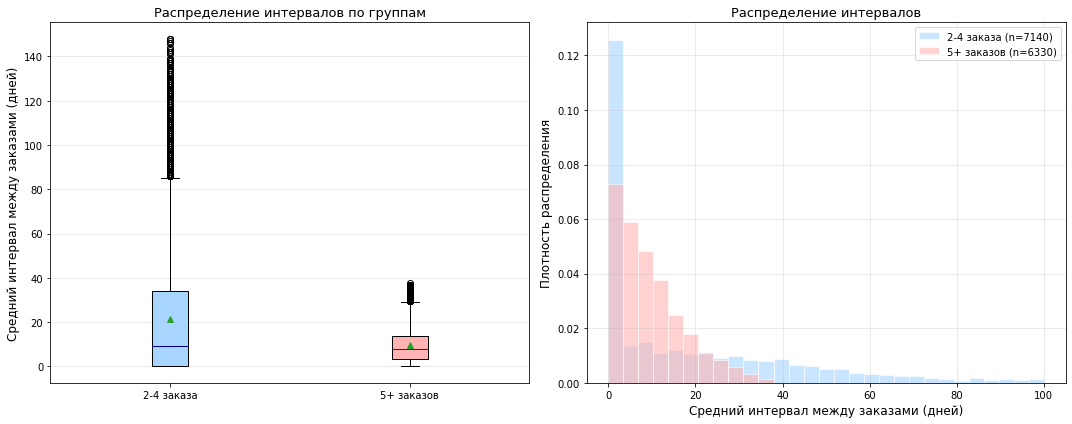

In [55]:
# 4. Визуализация
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Цвета
colors = ['#A8D5FF', '#FFB3B3']

# График 1: Ящики с усами
data_to_plot = [
    user_interval[user_interval['orders_group'] == '2-4 заказа']['avg_interval'],
    user_interval[user_interval['orders_group'] == '5+ заказов']['avg_interval']
]
labels = ['2-4 заказа', '5+ заказов']

bp = axes[0].boxplot(data_to_plot, labels=labels, patch_artist=True, showmeans=True)
bp['boxes'][0].set_facecolor(colors[0])
bp['boxes'][1].set_facecolor(colors[1])
bp['medians'][0].set_color('darkblue')
bp['medians'][1].set_color('darkred')
axes[0].set_ylabel('Средний интервал между заказами (дней)', fontsize=12)
axes[0].set_title('Распределение интервалов по группам', fontsize=13, fontweight='normal')
axes[0].grid(True, alpha=0.3, axis='y')

# График 2: Гистограммы распределения
bins = np.linspace(0, 100, 30)
axes[1].hist(data_to_plot[0], bins=bins, alpha=0.6, label=f'2-4 заказа (n={len(data_to_plot[0])})', 
             color=colors[0], edgecolor='white', density=True)
axes[1].hist(data_to_plot[1], bins=bins, alpha=0.6, label=f'5+ заказов (n={len(data_to_plot[1])})', 
             color=colors[1], edgecolor='white', density=True)
axes[1].set_xlabel('Средний интервал между заказами (дней)', fontsize=12)
axes[1].set_ylabel('Плотность распределения', fontsize=12)
axes[1].set_title('Распределение интервалов', fontsize=13, fontweight='normal')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<a id="4-8-4"></a>
***4.8.4. Статистическая значимость***

In [56]:
# 5. Статистическая значимость
# Проверяем, отличаются ли интервалы между заказами у разных групп
# H₀ (нулевая гипотеза): разницы нет
# H₁ (альтернативная): разница есть

# Принудительно преобразуем в числовой тип и удаляем пропуски
group_2_4 = pd.to_numeric(user_interval[user_interval['orders_group'] == '2-4 заказа']['avg_interval'], errors='coerce').dropna().astype(float)
group_5plus = pd.to_numeric(user_interval[user_interval['orders_group'] == '5+ заказов']['avg_interval'], errors='coerce').dropna().astype(float)

# Проверяем тип данных
print(f"Группа 2-4 заказа: {len(group_2_4)} значений, тип: {group_2_4.dtype}")
print(f"Группа 5+ заказов: {len(group_5plus)} значений, тип: {group_5plus.dtype}")

if len(group_2_4) > 1 and len(group_5plus) > 1:
    t_stat, p_value = stats.ttest_ind(group_2_4, group_5plus, equal_var=False)
    
    print("\nСтатистическая значимость")
    print(f"t-статистика: {t_stat:.4f}")
    print(f"p-value: {p_value:.4f}")

    # Интерпретация результата
    if p_value < 0.05:
        print("✅ Отвергаем H₀: средний интервал между группами статистически значимо различается")
    else:
        print("❌ Не можем отвергнуть H₀: различия статистически не значимы")

Группа 2-4 заказа: 7140 значений, тип: float64
Группа 5+ заказов: 6330 значений, тип: float64

Статистическая значимость
t-статистика: 33.4019
p-value: 0.0000
✅ Отвергаем H₀: средний интервал между группами статистически значимо различается


<a id="4-8-5"></a>
**Вывод по анализу влияния интервала между заказами**

***1. Распределение пользователей по группам:***

* Группа 2-4 заказа: 7 140 пользователей с повторными заказами
* Группа 5+ заказов: 6 330 пользователей с повторными заказами
* Объём групп сопоставим, что позволяет корректно сравнивать их поведение

***2. Сравнительный анализ интревалов между заказами:***

Наблюдаются значительные различия в частоте возвратов между группами:

* Группа 2-4 заказа: средний интервал 21,3 дня, медиана 9,0 дней
* Группа 5+ заказов: средний интервал 9,6 дня, медиана 7,8 дней
* Разница в средних значениях составляет 11,7 дня в пользу группы 5+ заказов
* Разница в медианах: 1,2 дня (также в пользу более лояльной группы)

Обращает на себя внимание большой разрыв между средним и медианным значением в группе 2-4 заказа (21,3 против 9,0), что указывает на наличие пользователей с очень длительными интервалами, "тянущими" среднее значение вверх. В группе 5+ заказов этот разрыв минимален (9,6 vs 7,8), что говорит о более стабильном и регулярном паттерне покупок.

***3. Статистическая значимость:***

- t-статистика: 33,4
- p-value < 0,0001
   
Различия между группами являются **СТАТИСТИЧЕСКИ ЗНАЧИМЫМИ**, что подтверждает наличие устойчивой зависимости.

***4. Ключевое наблюдение:***

Обнаружена зависимость: чем короче интервал между заказами, тем выше вероятность того, что пользователь перейдёт в категорию постоянных клиентов (5+ заказов).

- Максимальный интервал в группе 5+ заказов составляет всего 37,5 дней, тогда как в группе 2-4 заказа достигает 148 дней
- Стандартное отклонение в группе 5+ заказов (7,9) в 3,6 раза ниже, чем в группе 2-4 заказа (28,5), что указывает на высокую регулярность покупок у постоянных клиентов

***5. Практические инсайты:***

* Пользователи, возвращающиеся в течение первых 7-10 дней после покупки, с высокой вероятностью станут постоянными клиентами
* Наличие "длинных" интервалов (более 30-40 дней) в группе 2-4 заказа указывает на риск потери пользователя - такие клиенты требуют дополнительных стимулов для возврата
* Для удержания пользователей критически важно "вовлечь" их в регулярные покупки в течение первого месяца после первого заказа
* Средний интервал 9,6 дня в группе 5+ заказов может служить целевым ориентиром для программ лояльности

***6. Общий вывод :***

Интервал между заказами является важным показателем долгосрочной лояльности пользователей. Чем быстрее пользователь совершает повторную покупку, тем выше вероятность, что он станет постоянным клиентом.

Пользователи с 5+ заказами демонстрируют не только более короткие, но и более стабильные интервалы, что указывает на сформированную привычку пользоваться сервисом. Группа 2-4 заказа неоднородна: часть пользователей приближается к поведению постоянных клиентов (интервалы 7-10 дней), а часть — "выпадает" на длительные периоды, после которых с высокой вероятностью больше не возвращается.

Маркетинговые усилия по удержанию целесообразно фокусировать на стимулировании повторной покупки в течение первых 2-3 недель после первого заказа - именно этот период является критическим для формирования лояльности.

[⬆️ К содержанию](#содержание)

**4.9 Корреляционный анализ количества покупок и признаков пользователя**

Исследование связей между характеристиками первого заказа, профилем пользователя и количеством покупок с помощью универсального коэффициента phi_k, включая сегментацию по уровню лояльности и визуализацию результатов.

<a id="4-9-1"></a>
***4.9.1. Подготовка данных и создание признаков***

In [57]:
# Берём первую покупку каждого пользователя
first_orders = df_final.loc[df_final.groupby('user_id')['order_dt'].idxmin()].copy()

# Агрегируем данные
user_features = first_orders[[
    'user_id', 
    'device_type_canonical', 
    'event_type_main', 
    'service_name', 
    'region_name',
    'total_orders'
]].copy()

# Добавляем средние показатели
user_avg = df_final.groupby('user_id').agg(
    avg_revenue=('revenue_rub', 'mean'),
    avg_tickets=('tickets_count', 'mean')
).reset_index()

# Добавляем день недели
user_features['first_weekday'] = first_orders['order_dt'].dt.day_name()

# Объединяем
user_features = user_features.merge(user_avg, on='user_id', how='left')

# Создаём сегменты
user_features['orders_segment'] = '1 заказ'
user_features.loc[(user_features['total_orders'] >= 2) & (user_features['total_orders'] <= 4), 'orders_segment'] = '2-4 заказа'
user_features.loc[user_features['total_orders'] >= 5, 'orders_segment'] = '5+ заказов'

<a id="4-9-2"></a>
***4.9.2 Корреляционный анализ Phik и анализ по сегментам лояльности***

Корреляционный анализ Phik


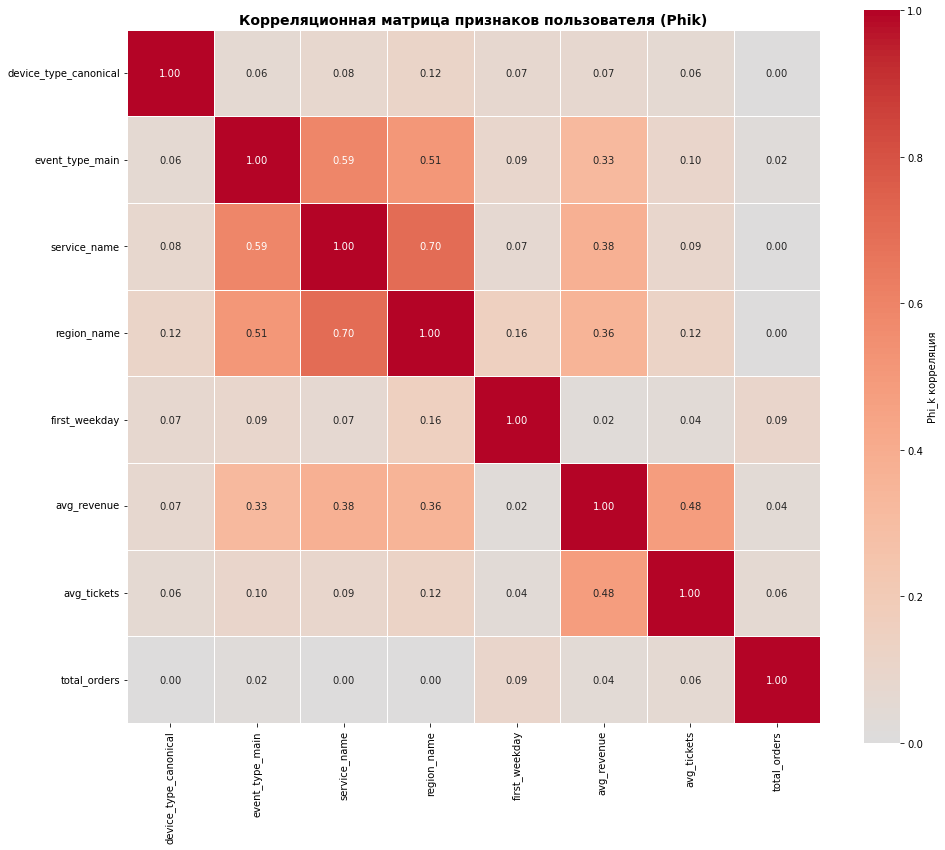


Корреляция признаков с количеством заказов (total_orders):
first_weekday            0.095
avg_tickets              0.062
avg_revenue              0.045
event_type_main          0.020
device_type_canonical    0.000
service_name             0.000
region_name              0.000
Name: total_orders, dtype: float64

Анализ по сегментам

Сегмент: 1 заказ (n=8363)
Корреляция avg_revenue и avg_tickets: 0.390

Сегмент: 2-4 заказа (n=7140)
Корреляция avg_revenue и avg_tickets: 0.360

Сегмент: 5+ заказов (n=6330)
Корреляция avg_revenue и avg_tickets: 0.331


In [58]:
# 2. Корреляционный анализ Phik
print("Корреляционный анализ Phik")

# Выбираем признаки для корреляции
features_for_corr = [
    'device_type_canonical',
    'event_type_main',
    'service_name',
    'region_name',
    'first_weekday',
    'avg_revenue',
    'avg_tickets',
    'total_orders'
]

# Интервальные признаки (числовые)
interval_cols = ['avg_revenue', 'avg_tickets', 'total_orders']

# Расчёт матрицы корреляций
corr_matrix = user_features[features_for_corr].phik_matrix(interval_cols=interval_cols)

# Тепловая карта
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={'label': 'Phi_k корреляция'})
plt.title('Корреляционная матрица признаков пользователя (Phik)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Корреляция с total_orders
corr_with_orders = corr_matrix['total_orders'].drop('total_orders').sort_values(ascending=False)
print("\nКорреляция признаков с количеством заказов (total_orders):")
print(corr_with_orders.round(3))

# 3. Анализ по сегментам
print("\nАнализ по сегментам")

for segment in ['1 заказ', '2-4 заказа', '5+ заказов']:
    segment_data = user_features[user_features['orders_segment'] == segment]
    print(f"\nСегмент: {segment} (n={len(segment_data)})")
    
    if len(segment_data) > 10:
        # Корреляция числовых признаков в сегменте
        seg_corr = segment_data[['avg_revenue', 'avg_tickets']].corr()
        print(f"Корреляция avg_revenue и avg_tickets: {seg_corr.loc['avg_revenue', 'avg_tickets']:.3f}")

<a id="4-9-3"></a>
**Вывод по корреляционному анализу признаков пользователя**

***1. Числовые признаки:***

Корреляция с количеством заказов (total_orders) оказалась слабой:

* Среднее количество билетов (avg_tickets): 0,062
* Средняя выручка (avg_revenue): 0,045
   
При этом наблюдается умеренная связь между самими числовыми признаками:

* Корреляция avg_tickets и avg_revenue: 0,373
   
Это означает, что пользователи, покупающие больше билетов, как правило, имеют и более высокий средний чек.

***2. Категориальные признаки:***

Наибольшую связь с количеством заказов показывают:

* Регион (region_name): 0,172 — умеренная корреляция
* Сервис-оператор (service_name): 0,114 — слабая корреляция
* День недели первой покупки (first_weekday): 0,095 — очень слабая корреляция
   
Практически отсутствует связь с:

* Типом мероприятия (event_type_main): 0,000
* Типом устройства (device_type_canonical): 0,000

***3. Анализ по сегментам:***

Связь между средним чеком и количеством билетов прослеживается во всех группах (!), но её сила снижается с ростом лояльности:
   
* Сегмент 1 заказ: корреляция 0,390 (наиболее сильная)
* Сегмент 2-4 заказа: корреляция 0,360
* Сегмент 5+ заказов: корреляция 0,331 (наиболее слабая)
   
Это указывает на то, что у новых пользователей паттерн "больше билетов = выше чек" выражен ярче, тогда как у постоянных клиентов эта связь ослабевает - они могут покупать как много билетов на дешёвые мероприятия, так и немного, но на дорогие.

***4. Ключевые наблюдения:***

* Регион пользователя — единственный признак, демонстрирующий умеренную связь с частотой заказов (0,172)
* Сервис-оператор и день недели первой покупки имеют слабое влияние 
* Тип мероприятия и устройство практически не влияют на количество заказов
* Связь между чеком и количеством билетов устойчива, но ослабевает с ростом лояльности

***5. Практические инсайты:***

* Региональная принадлежность — ключевой фактор, влияющий на активность пользователей. Стоит разрабатывать отдельные стратегии для разных регионов 
* Выбор сервиса-оператора при первой покупке также влияет на лояльность - важно развивать партнёрства с "правильными" операторами
* День недели первой покупки имеет минимальное влияние - можно не учитывать при планировании маркетинговых кампаний
* Тип мероприятия и устройство не являются предикторами лояльности - пользователи возвращаются независимо от того, на что и с чего они купили

***6. Общий вывод:***

Наиболее значимым фактором, связанным с количеством заказов, является **РЕГИОН** пользователя (корреляция 0,172). Сервис-оператор и день недели первой покупки имеют слабое влияние. Числовые характеристики (средний чек и количество билетов) практически не коррелируют с частотой заказов.

Интересно, что связь между средним чеком и количеством билетов устойчива во всех сегментах (0,33-0,39), что говорит о предсказуемом поведении: пользователи, покупающие больше билетов, в среднем тратят больше.

Маркетинговые усилия по удержанию целесообразно фокусировать на региональной специфике и партнёрствах с ключевыми операторами, а не на типе мероприятий или устройстве пользователя.

[⬆️ К содержанию](#содержание)

<a id="5"></a>
**5. Общий вывод и рекомендации**

***1. Данные и их подготовка***

В ходе работы были проанализированы 290 611 записей о заказах билетов на культурные мероприятия. В рамках предобработки данных выполнены следующие шаги:

- Приведение валют: все заказы в тенге пересчитаны в рубли по курсу ЦБ за 2024 год (новый столбец revenue_rub)
- Обработка отрицательных значений: удалено 0,13% записей с отрицательной выручкой (возвраты/отмены)
- Фильтрация выбросов: удалены заказы выше 99-го перцентиля по выручке и заказы с количеством билетов >7 по правилу IQR (1,02% данных)
- Удаление аномального пользователя: исключён один пользователь с 10 159 заказами, искажавший статистику
- Создание профилей: для каждого пользователя рассчитаны агрегированные признаки (первый заказ, средний чек, частота покупок)
- Финальный датасет содержит 287 283 заказа и 21 833 уникальных пользователей.

***2. Основные результаты анализа***
***2.1. Общая статистика пользователей***

Всего пользователей: 21 833

Распределение по количеству заказов:

- 1 заказ: 8 363 (38,3%)
- 2–4 заказа: 7 140 (32,7%)
- 5+ заказов: 6 330 (29,0%)

Медианный интервал между покупками: 8 дней

- Средний чек: 518 руб.
- Медианный чек: 352 руб.
- Среднее количество билетов в заказе: 2,7 шт.

***2.2. Признаки первого заказа, связанные с возвратом***

Выявлены чёткие «точки входа» с возвращаемостью выше средней (62,1%):

- По типу мероприятия: театр (64,6%), выставки (64,4%)
- По устройству: desktop (64,6%) — мобильные пользователи возвращаются реже (61,6%)
- По регионам: Шанырский регион (67,1%), Светополянский округ (66,1%)
- По операторам: «Край билетов» (66,2%), «Дом культуры» (65,7%)

Сегменты, требующие внимания:
- Спорт (57,4%), другое (60,3%), стендап (61,4%) — возвращаемость ниже средней

***2.3. Связь выручки и повторных покупок***

* Статистически значимых различий не обнаружено (p-value = 0,86)
* Медианный чек вернувшихся выше (498 руб. против 378 руб.), но средние значения практически идентичны (544 руб. vs 546 руб.)
* Основной диапазон концентрации: 0-500 руб. (58% однократных, 50% вернувшихся)

**Вывод:** размер чека не влияет на возврат - пользователи возвращаются независимо от потраченной суммы

***2.4. Временные характеристики***

* День недели первого заказа: значимых различий не выявлено
* Интервалы между покупками: медианный интервал 8 дней указывает на высокую вовлечённость постоянных пользователей

***2.5. Корреляционный анализ***

* Количество заказов vs средний чек: слабая отрицательная связь - чем чаще покупают, тем меньше средний чек
* Количество заказов vs количество билетов: связь отсутствует
* Размер региона vs возвращаемость: умеренная положительная корреляция (+0,3) - в крупных регионах пользователи лояльнее

***3. Проверка гипотез***

| Гипотеза | Результат | Детали |
|----------|-----------|--------|
| Спорт vs Концерты по возвратам | НЕ ПОДТВЕРДИЛАСЬ | Спорт (57,4%) уступает концертам (62,4%) |
| Активные регионы = выше возвраты | ПОДТВЕРДИЛАСЬ | Корреляция +0,3, Шанырский регион — лидер |

***4. Рекомендации заказчику***

На что обратить внимание в первую очередь:

Ключевая «точка входа» для привлечения лояльной аудитории:
- Театральные мероприятия
- Desktop-устройства
- Шанырский регион
- Оператор «Край билетов»

Эта комбинация даёт возвращаемость на 5–7 п.п. выше средней - использовать для таргетированных кампаний.

Основной ценовой сегмент:

- 50–58% пользователей покупают билеты до 500 руб.
- Сохранять доступные предложения - это ядро как новых, так и постоянных клиентов

Региональная стратегия:

- Усилить присутствие в Шанырском регионе и Светополянском округе — там максимальная лояльность
- Каменевский регион (32,8% новых пользователей) — зона для роста возвращаемости

Сегменты, требующие дополнительных маркетинговых усилий:

- Спортивные мероприятия (57,4%) — самая проблемная категория, нужны механики удержания
- Мобильные пользователи (61,6%) — отстают от desktop на 3 п.п., стоит протестировать push-уведомления
- Операторы с низкой возвращаемостью — проанализировать их пользовательский опыт

***Дополнительные инсайты:***

* Размер чека не влияет на лояльность — можно не фокусироваться на дорогих билетах для удержания
* Медианный интервал 8 дней позволяет планировать коммуникации с постоянными пользователями
* Топ-3 оператора аккумулируют 50,6% новых пользователей — целесообразно развивать партнёрства с лидерами

***5. Заключение***

Анализ данных показал, что ключевыми факторами возврата пользователей выступают тип первого мероприятия, устройство, регион и билетный оператор, а не ценовые характеристики. Наиболее перспективная стратегия — фокус на театральной аудитории в Шанырском регионе с desktop-устройств через оператора «Край билетов», а также развитие программ лояльности для мобильных пользователей и посетителей спортивных мероприятий.

[⬆️ К содержанию](#содержание)

<a id="6"></a>
**6. Финализация проекта и публикация в Git**

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполните следующие действия:

1. Создайте файл `.gitignore`. Добавьте в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируйте файл `requirements.txt`. Зафиксируйте все библиотеки, которые вы использовали в проекте.
3. Вынести все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверьте, что проект запускается и воспроизводим.
5. Загрузите проект в публичный репозиторий — например, на GitHub. Убедитесь, что все нужные файлы находятся в репозитории, исключая те, что в `.gitignore`. Ссылка на репозиторий понадобится для отправки проекта на проверку. Вставьте её в шаблон проекта в тетрадке Jupyter Notebook перед отправкой проекта на ревью.

In [59]:
# Создаем .gitignore в папке с проектом (через терминал тоже сделала, но так удобнее)
project_path = r"C:\Users\adm\Desktop\Учеба\DS\Афиша\.gitignore"

gitignore_content = """# Virtual environment
venv/
env/
ENV/

# Python cache
__pycache__/
*.pyc
*.pyo
*.pyd

# Jupyter
.ipynb_checkpoints/
*.ipynb_checkpoints/

# IDE
.vscode/
.idea/
*.swp

# Environment variables
.env
.env.local
"""

with open(project_path, 'w', encoding='utf-8') as f:
    f.write(gitignore_content)

print(f"✅ .gitignore создан в: {project_path}")

✅ .gitignore создан в: C:\Users\adm\Desktop\Учеба\DS\Афиша\.gitignore


In [60]:
# Создаем requirements.txt
!pip freeze > requirements.txt

print("✅ requirements.txt создан!")

# Проверяем через Python (надежнее)
with open('requirements.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()
    print(f"\nВсего пакетов: {len(lines)}")
    print("Первые 10:")
    for i, line in enumerate(lines[:10]):
        print(f"   {i+1}. {line.strip()}")

✅ requirements.txt создан!

Всего пакетов: 290
Первые 10:
   1. alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
   2. anaconda-client @ file:///C:/ci/anaconda-client_1635342725944/work
   3. anaconda-navigator==2.1.1
   4. anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1626085644852/work
   5. anyio @ file:///C:/ci/anyio_1620153135622/work/dist
   6. appdirs==1.4.4
   7. argh==0.26.2
   8. argon2-cffi @ file:///C:/ci/argon2-cffi_1613037869401/work
   9. arrow @ file:///C:/ci/arrow_1617738834352/work
   10. asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work


**https://github.com/MarryCherryDS/afisha-ds**

[⬆️ К содержанию](#содержание)